In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install pywaffle
#!pip install missingno
#!pip install qbstyles
#!pip install psycopg2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px
import missingno as msno 
#import psycopg2
from qbstyles import mpl_style
import itertools 
import re
from sklearn.preprocessing import LabelEncoder
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. How many patients were registered in each unique occupation?

In [2]:
data= pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Demography')
data.head(6)

inpatient_number  gender  weight  height        BMI     occupation ageCat
0            857781    Male    50.0    1.64  18.590125  UrbanResident  69-79
1            743087  Female    51.0    1.63  19.195303  UrbanResident  69-79
2            866418    Male    70.0    1.70  24.221453         farmer  59-69
3            775928    Male    65.0    1.70  22.491349  UrbanResident  69-79
4            810128  Female    76.0    1.55  31.633715  UrbanResident  69-79
5            823318  Female    45.0    1.56  18.491124  UrbanResident  79-89

In [3]:
data['occupation'].value_counts()

occupation
UrbanResident    1670
farmer            198
Others             89
worker             17
Officer             7
Name: count, dtype: int64

##### Comment -- Highest occupation registerd for Urban Resident and Lowest  for Officer occupations  (Q1)

# 2. Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

In [4]:
GCS_data= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Responsivenes")
GCS_data.head(2)
GCS_data['GCS_scale']= GCS_data.GCS.apply( 
    lambda x: 'slab1' if x<=5
    else 'slab2' if x>=6 and x<=10
    else 'slab3' if x>=11 and x<=15
    else ' ')
GCS_data.GCS_scale.value_counts()

GCS_scale
slab3    1982
slab1      14
slab2      12
Name: count, dtype: int64

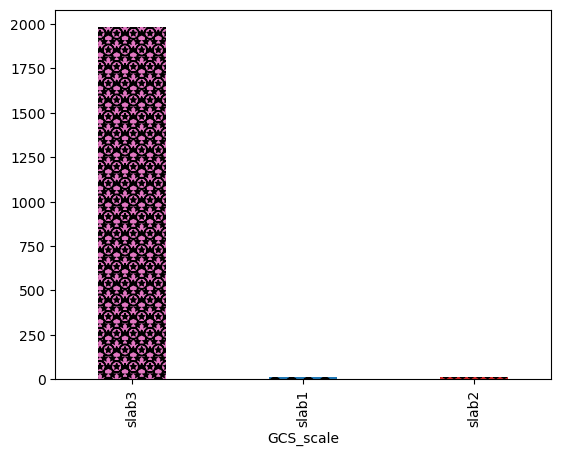

In [5]:
bar_colors = ['tab:pink', 'tab:blue', 'tab:red']
GCS_data['GCS_scale'].value_counts().plot(kind='bar',color= bar_colors,width=0.4,hatch=['**O', 'oO', 'O.O'] )
plt.show()

#### *Comment -- This bar chart is divided into 3 slabs with interval of 5(Q2)*

# 3. Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [6]:
data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
data.head()

inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   
2            866418                 Home     Cardiology  NonEmergency   
3            775928                 Home     Cardiology     Emergency   
4            810128                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1                 NaN     OxygenTherapy   
2           Cardiology            2                 NaN     OxygenTherapy   
3           Cardiology            1                 NaN     OxygenTherapy   
4           Cardiology            1                 NaN     OxygenTherapy   

   dischargeDay Admission_date  ... death_within_28_days  \
0            11     2017-01-24  ...                    0   
1             8     2017-05-05  ...                    0   
2             5     2016-11-18  ...                    0   
3            11     2017-10-02  ...                    0   
4             5     2019-11-17  ...                    0   

   re_admission_within_28_days  death_within_3_months  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            1                      0   
4                            0                      0   

   re_admission_within_3_months  death_within_6_months  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             1                      0   
4                             0                      0   

   re_admission_within_6_months  time_of_death__days_from_admission  \
0                             0                                 NaN   
1                             0                                 NaN   
2                             0                                 NaN   
3                             1                                 NaN   
4                             0                                 NaN   

   readmission_time_days_from_admission  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                  19.0   
4                                   NaN   

   return_to_emergency_department_within_6_months  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             1.0   
4                                             0.0   

   time_to_emergency_department_within_6_months  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                          19.0  
4                                           NaN  

[5 rows x 21 columns]

In [7]:
from datetime import datetime, timedelta

data['Discharge_date'] = data['Admission_date'] + pd.to_timedelta(data['dischargeDay'], unit='D')
data['Discharge_date']

0      2017-02-04
1      2017-05-13
2      2016-11-23
3      2017-10-13
4      2019-11-22
          ...    
2003   2016-02-12
2004   2017-04-06
2005   2018-02-05
2006   2019-11-28
2007   2017-02-23
Name: Discharge_date, Length: 2008, dtype: datetime64[ns]

In [8]:
data.head(2)    # Added column Discharge_date

inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1                 NaN     OxygenTherapy   

   dischargeDay Admission_date  ... re_admission_within_28_days  \
0            11     2017-01-24  ...                           0   
1             8     2017-05-05  ...                           0   

   death_within_3_months  re_admission_within_3_months  death_within_6_months  \
0                      0                             0                      0   
1                      0                             0                      0   

   re_admission_within_6_months  time_of_death__days_from_admission  \
0                             0                                 NaN   
1                             0                                 NaN   

   readmission_time_days_from_admission  \
0                                   NaN   
1                                   NaN   

   return_to_emergency_department_within_6_months  \
0                                             0.0   
1                                             0.0   

   time_to_emergency_department_within_6_months  Discharge_date  
0                                           NaN      2017-02-04  
1                                           NaN      2017-05-13  

[2 rows x 22 columns]

In [9]:
data[['dischargeDay','Admission_date','Discharge_date']]     # Required result 

dischargeDay Admission_date Discharge_date
0               11     2017-01-24     2017-02-04
1                8     2017-05-05     2017-05-13
2                5     2016-11-18     2016-11-23
3               11     2017-10-02     2017-10-13
4                5     2019-11-17     2019-11-22
...            ...            ...            ...
2003             5     2016-02-07     2016-02-12
2004             8     2017-03-29     2017-04-06
2005            14     2018-01-22     2018-02-05
2006             1     2019-11-27     2019-11-28
2007             6     2017-02-17     2017-02-23

[2008 rows x 3 columns]

#### *Comment--The discharge date is found by using discharge day and admission date*

# 4.What percentage of patients had Biventricular heart failure?

In [14]:
data = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="CardiacComplications")
data.head()

total=data['type_of_heart_failure'].count()
total

leftrightfailure = data['type_of_heart_failure'].value_counts()
leftrightfailure

Biventricular_heart_failure =  (leftrightfailure['Both']*100/total)
print('Biventricular_heart_failure = '+str(round(Biventricular_heart_failure,2))+ '%')


Biventricular_heart_failure = 73.71%


#### *Comment-- percentage of patients had Biventricular heart failure is 73.71%*

# 5. What is the ratio of patients who were responsive to pain vs responsive to sound?

In [15]:
Response = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Responsivenes", usecols='B')
Response.head(2)
Response.eye_opening.value_counts()

eye_opening
4    1966
3      25
1      14
2       3
Name: count, dtype: int64

In [16]:
[Resp_sound,Resp_pain] = Response[Response['eye_opening']== 3].count(), Response[Response['eye_opening']== 2].count()

In [17]:
Ratio= Resp_pain/Resp_sound
print("Ratio" + " " + str(Ratio))

Ratio eye_opening    0.12
dtype: float64


####  *Comment -- The ratio of patients who were responsive to pain vs responsive to sound is 0.12*

# 6.What was the average age group of the patients that had an outcome of 'Alive'?


In [18]:
Demo=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Demography")
Hosp=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")
Demo_hosp1=pd.merge(Demo[['inpatient_number','ageCat']],Hosp[['inpatient_number','outcome_during_hospitalization']])
Demo_hosp1.head(3)

inpatient_number ageCat outcome_during_hospitalization
0            857781  69-79                          Alive
1            743087  69-79                          Alive
2            866418  59-69                          Alive

In [19]:
#Alive patients alone is filtered out of the dataset

Demo_hosp = Demo_hosp1[Demo_hosp1.outcome_during_hospitalization.str.contains('Alive')]

# Age is generated randomly to determine the age of the alive patients

def Random_age(ageCat):
    Age_U, Age_L = map(int, ageCat.split('-'))
    return np.random.randint(Age_U, Age_L)

Demo_hosp['Age'] = Demo_hosp['ageCat'].apply(Random_age)

Demo_hosp.head()




/var/folders/x9/dnp4ms7s2n18gv4j4n5h1tgw0000gn/T/ipykernel_47677/3648651652.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demo_hosp['Age'] = Demo_hosp['ageCat'].apply(Random_age)


inpatient_number ageCat outcome_during_hospitalization  Age
0            857781  69-79                          Alive   75
1            743087  69-79                          Alive   78
2            866418  59-69                          Alive   65
3            775928  69-79                          Alive   72
4            810128  69-79                          Alive   71

In [20]:
Age_Average = Demo_hosp.Age.mean()
Age_Average= round(Age_Average)

print("Average age group of patients with outcome alive:",Age_Average)

Average age group of patients with outcome alive: 74


#### Average age group of patients with outcome alive: 74

# 7. Visualize missing data and missing patterns from Demography table using the "MissingNo" Library

In [21]:
import missingno as msno 

In [22]:
Demo1 = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography")
Demo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   int64  
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        1981 non-null   object 
 6   ageCat            2008 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.9+ KB


Text(0.5, 1.0, 'Missing values in Demography table')

<Figure size 500x500 with 0 Axes>

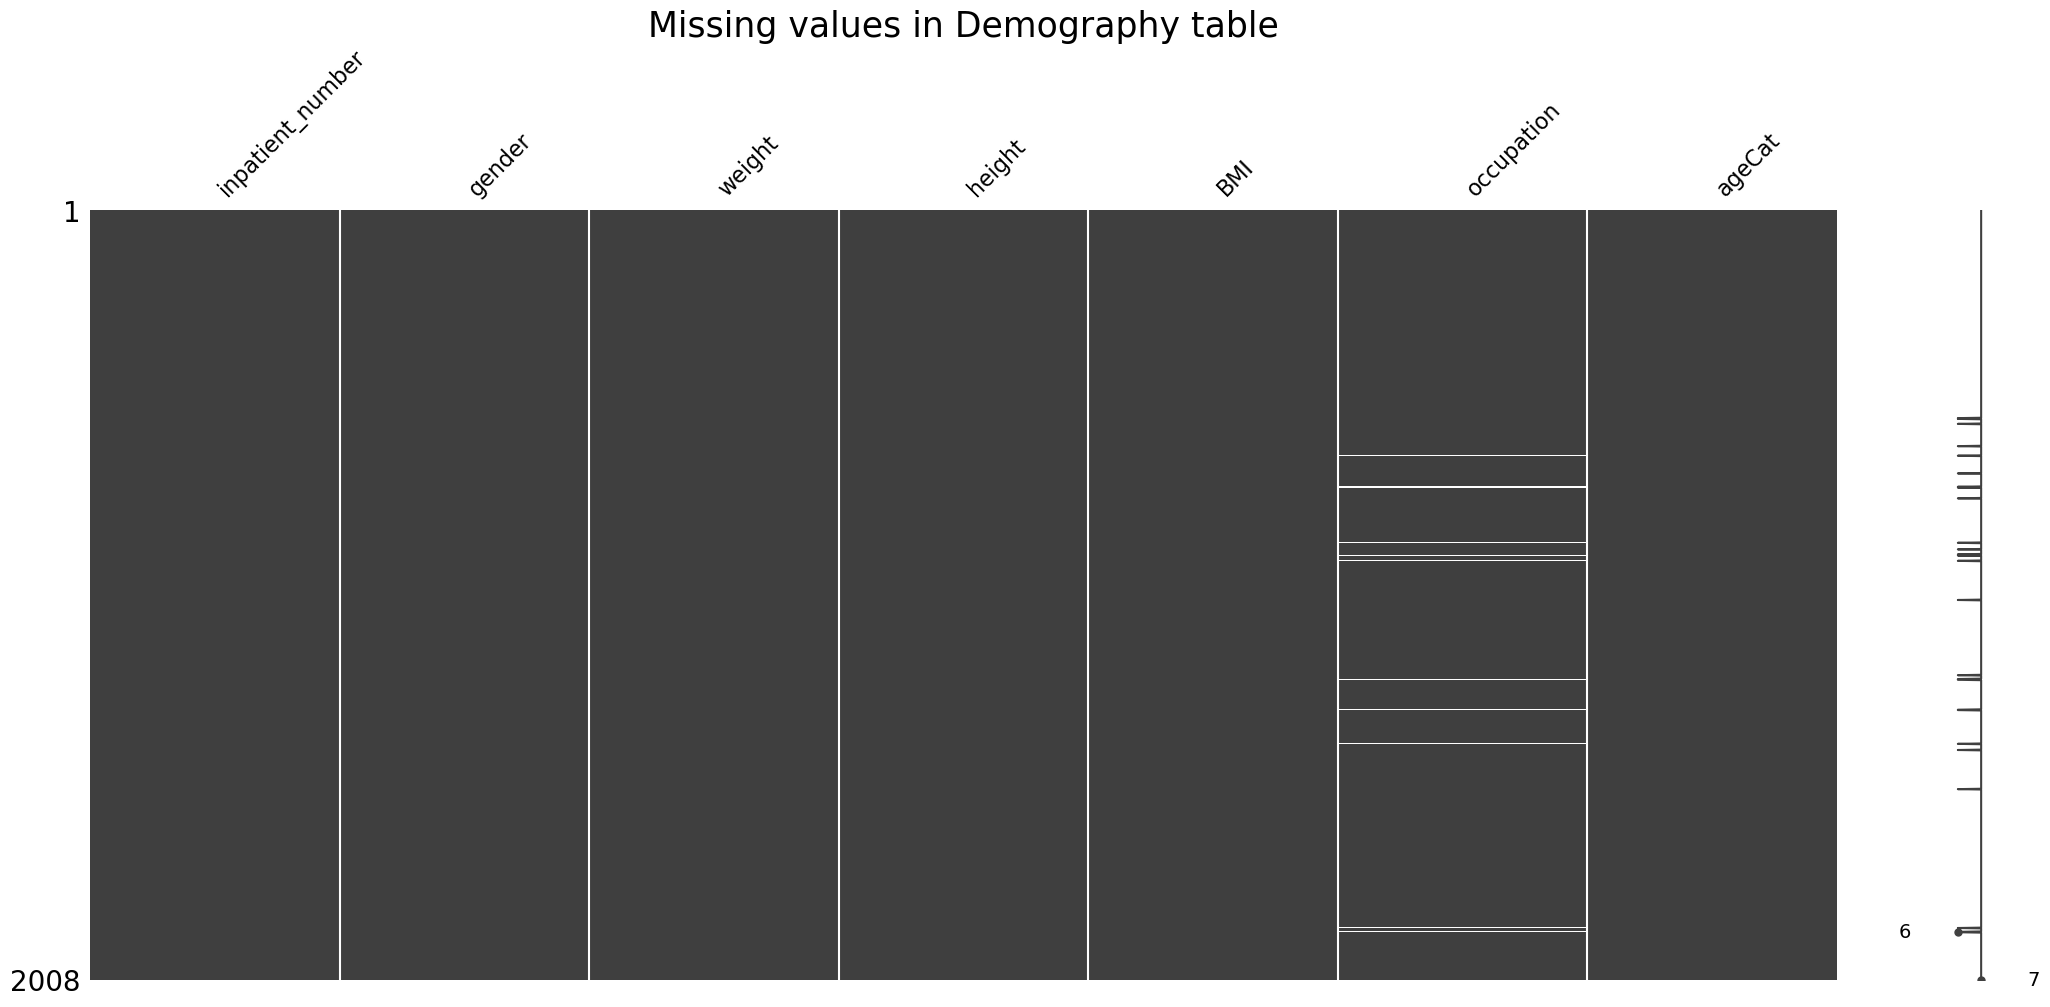

In [23]:
# Visualize missing values 
plt.figure(figsize=(5,5))
msno.matrix(Demo1) 
plt.title("Missing values in Demography table", fontsize = 25)

Text(0.5, 1.0, 'Missing values in Demography table')

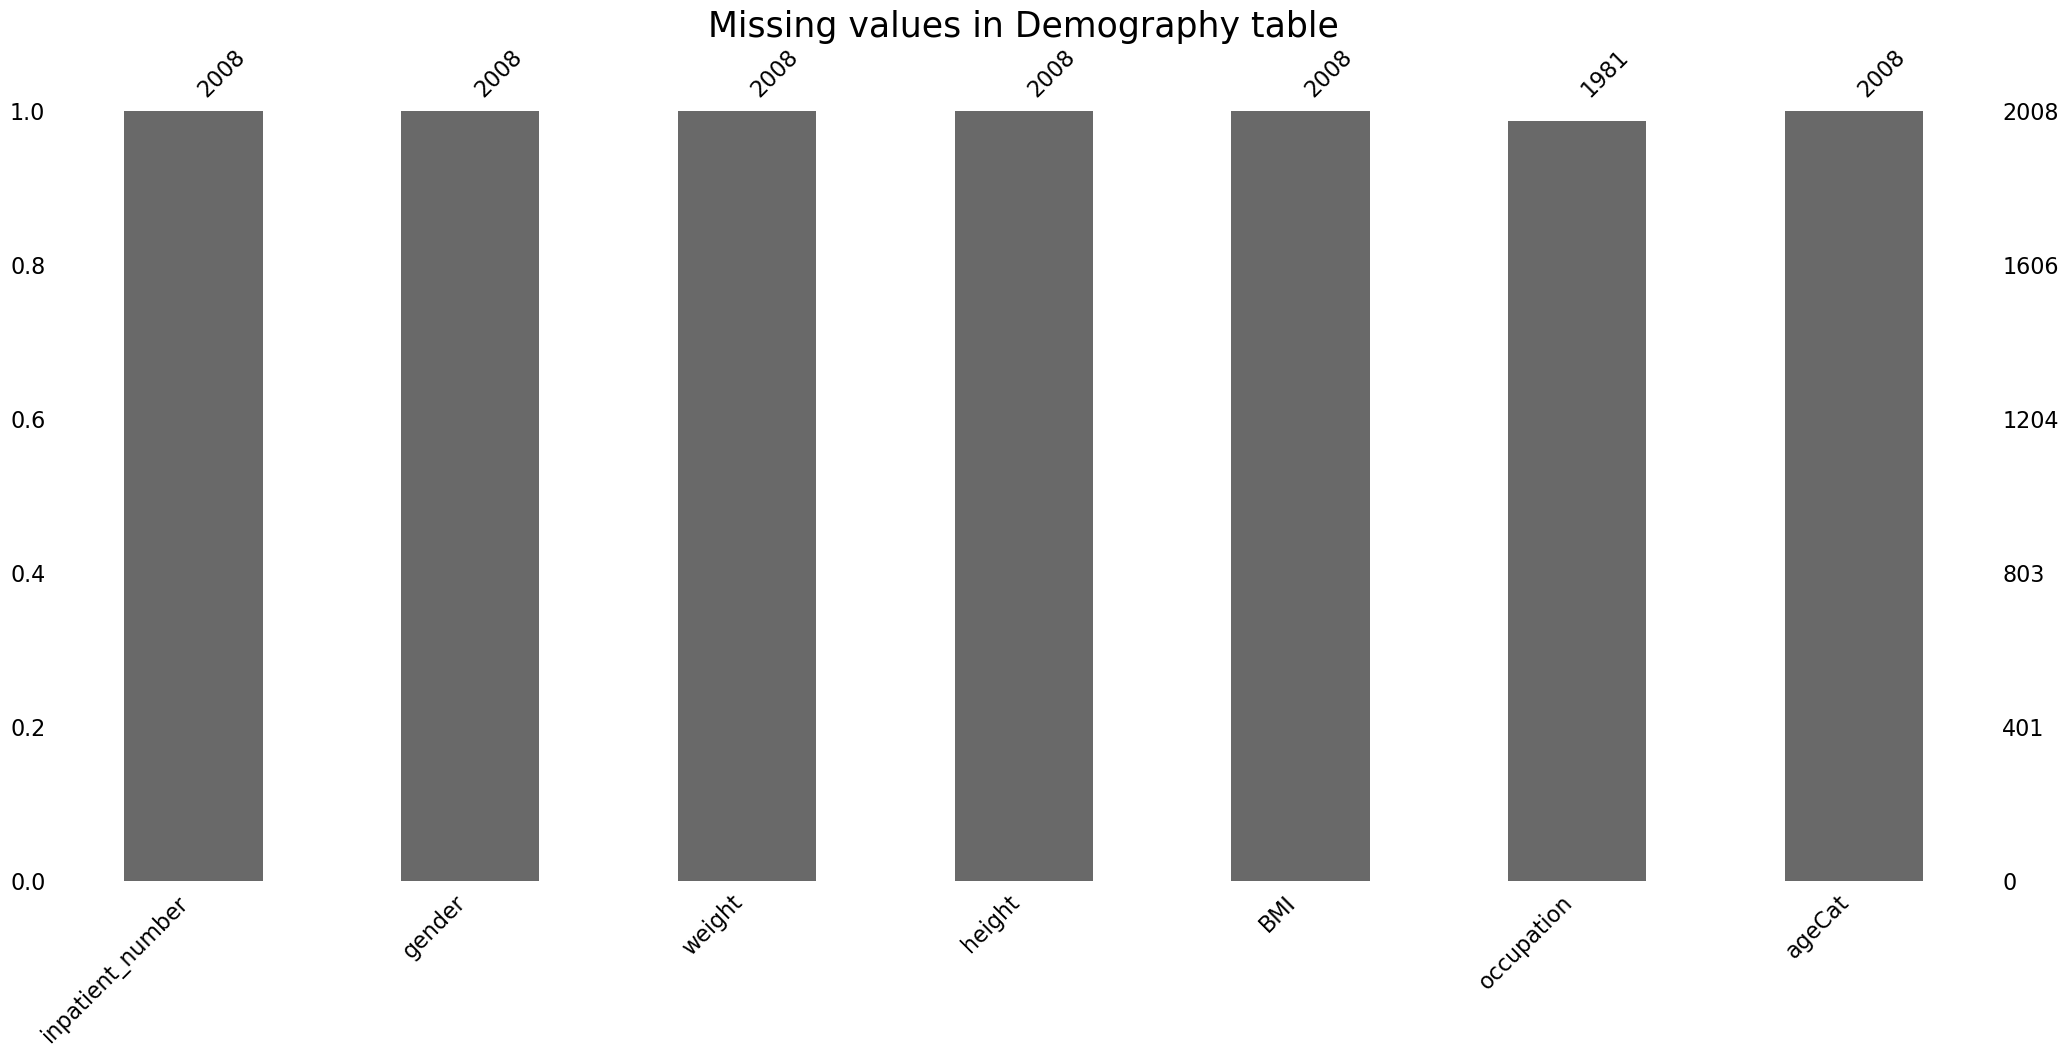

In [24]:
# visualizing missing patterns
msno.bar(Demo1) 
plt.title("Missing values in Demography table", fontsize = 25)

#### Comment - Occupation column has negative values

Text(0.5, 1.0, 'Missing values in Occupation')

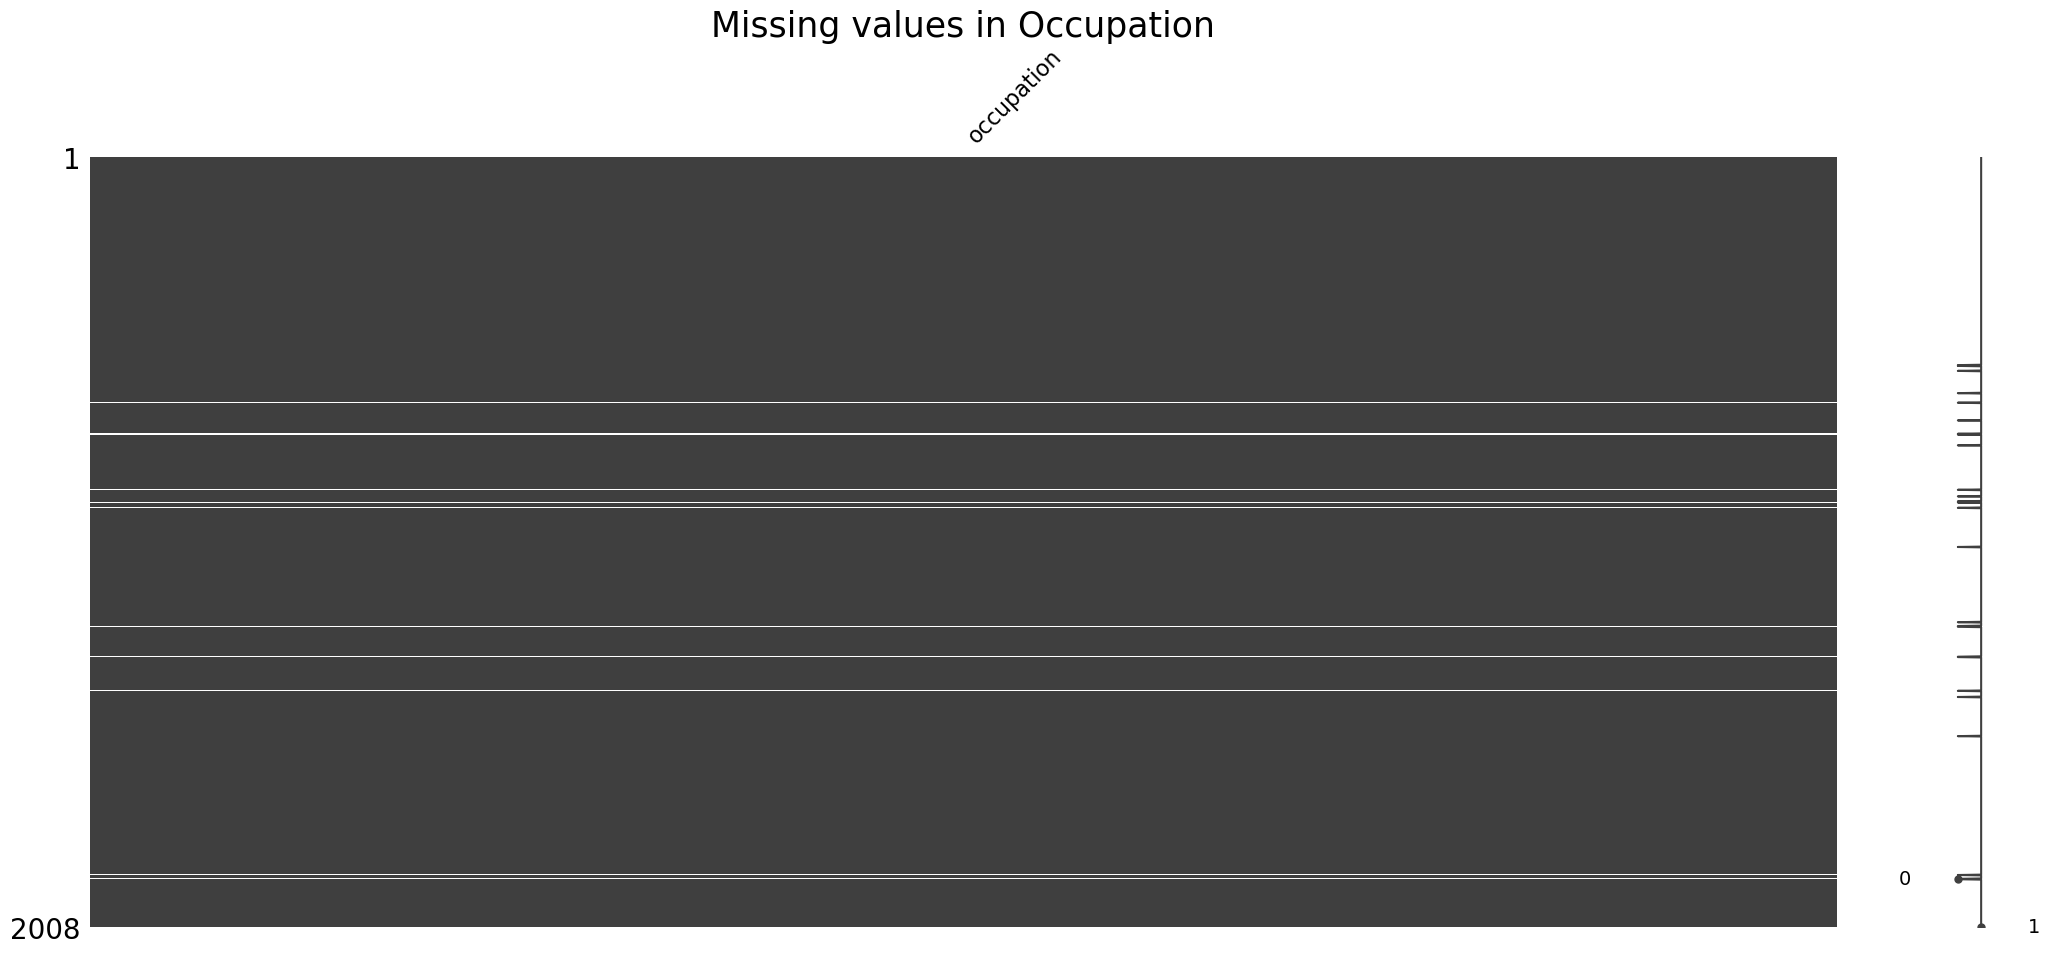

In [25]:
msno.matrix(Demo1[['occupation']])
plt.title("Missing values in Occupation", fontsize = 25)

# 8 Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

In [26]:
waff = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge", usecols='C,L,N,P')

#### To calculate the total death, the columns death_within_28_days,death_within_3_months,death_within_6_months were considered and new column was added to compile the patients who had the value 1.

In [27]:
def func(row):
    if row['death_within_28_days']==1 or row  ['death_within_3_months']==1 or row ['death_within_6_months']==1  :
           return 1
    else:
        return 0
    
waff['Death'] = waff.apply(func, axis=1)
waff1 = waff[waff['Death']==1]
waff1.head(2)

admission_ward  death_within_28_days  death_within_3_months  \
11     Cardiology                     0                      0   
15     Cardiology                     0                      0   

    death_within_6_months  Death  
11                      1      1  
15                      1      1

#### Count of patients in each admission ward and total deaths

In [28]:
count_d =waff1.groupby('admission_ward')['Death'].sum()
total = waff1.Death.sum()
print (total)
print(count_d)

57
admission_ward
Cardiology     42
GeneralWard     8
ICU             2
Others          5
Name: Death, dtype: int64


#### Percentage of the death in each admission ward

In [29]:
percentage = round(((count_d*100)/total),2)
label= waff.admission_ward.unique()
label1=label.tolist()
percentage

admission_ward
Cardiology     73.68
GeneralWard    14.04
ICU             3.51
Others          8.77
Name: Death, dtype: float64

#### Cardiology admission ward has the higher percentage of deaths when compared to other wards.

#### WAFFLE CHART

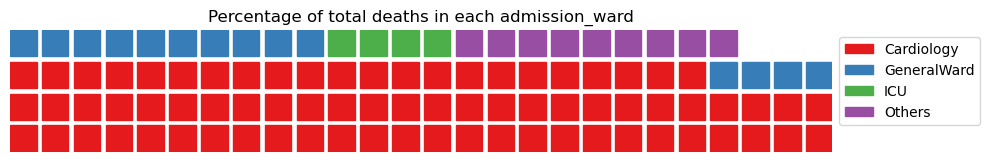

In [30]:
from pywaffle import Waffle 
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 4,
    figsize =(10,6),
    values = percentage,
    labels = label1,
    vertical= True,
    cmap_name = 'Set1',

legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
title = {"label": "Percentage of total deaths in each admission_ward"}) 
plt.show()

#### *Comment-- from this waffle chart,cardiology has more deaths when compared to others*

# 9.Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array

In [31]:
A = [[1,5],
    [2,5]]
B = [[5,7],
    [6,1]]

Ans = np.matmul(A,B)
print("output:",Ans)

output: [[35 12]
 [40 19]]


#### *Comment-- The output of 2 2D array multiplication is done and got the output*

# 10.Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

In [32]:
data3=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name='Labs')
data3.head(3)

inpatient_number  body_temperature  pulse  respiration  \
0            857781              36.7     87           19   
1            743087              36.8     95           18   
2            866418              36.5     98           18   

   systolic_blood_pressure  diastolic_blood_pressure        map  fio2  \
0                      102                        64  76.666667    33   
1                      150                        70  96.666667    33   
2                      102                        67  78.666667    33   

   creatinine_enzymatic_method   urea  ...  measured_residual_base  \
0                        108.3  12.55  ...                    -2.1   
1                         62.0   4.29  ...                     NaN   
2                        185.1  15.99  ...                     NaN   

   measured_bicarbonate  carboxyhemoglobin  body_temperature_blood_gas  \
0                  21.2                0.4                        37.0   
1                   NaN                NaN                         NaN   
2                   NaN                NaN                         NaN   

   oxygen_saturation  partial_oxygen_pressure  oxyhemoglobin  anion_gap  \
0               97.0                     93.0           95.9       17.8   
1                NaN                      NaN            NaN        NaN   
2                NaN                      NaN            NaN        NaN   

   free_calcium  total_hemoglobin  
0          1.14             125.0  
1           NaN               NaN  
2           NaN               NaN  

[3 rows x 107 columns]

In [33]:
data3.isnull()
data3.isnull().sum()

inpatient_number              0
body_temperature              0
pulse                         0
respiration                   0
systolic_blood_pressure       0
                           ... 
partial_oxygen_pressure    1015
oxyhemoglobin              1016
anion_gap                  1015
free_calcium               1015
total_hemoglobin           1016
Length: 107, dtype: int64

In [34]:
data3.isnull().sum().sum()

48352

In [35]:
len(data3)

2008

In [36]:
missing_percent=((data3.isnull().sum())/(len(data3)))*100
missing_percent

inpatient_number            0.000000
body_temperature            0.000000
pulse                       0.000000
respiration                 0.000000
systolic_blood_pressure     0.000000
                             ...    
partial_oxygen_pressure    50.547809
oxyhemoglobin              50.597610
anion_gap                  50.547809
free_calcium               50.547809
total_hemoglobin           50.597610
Length: 107, dtype: float64

#### Missing percentage is shown in the output above

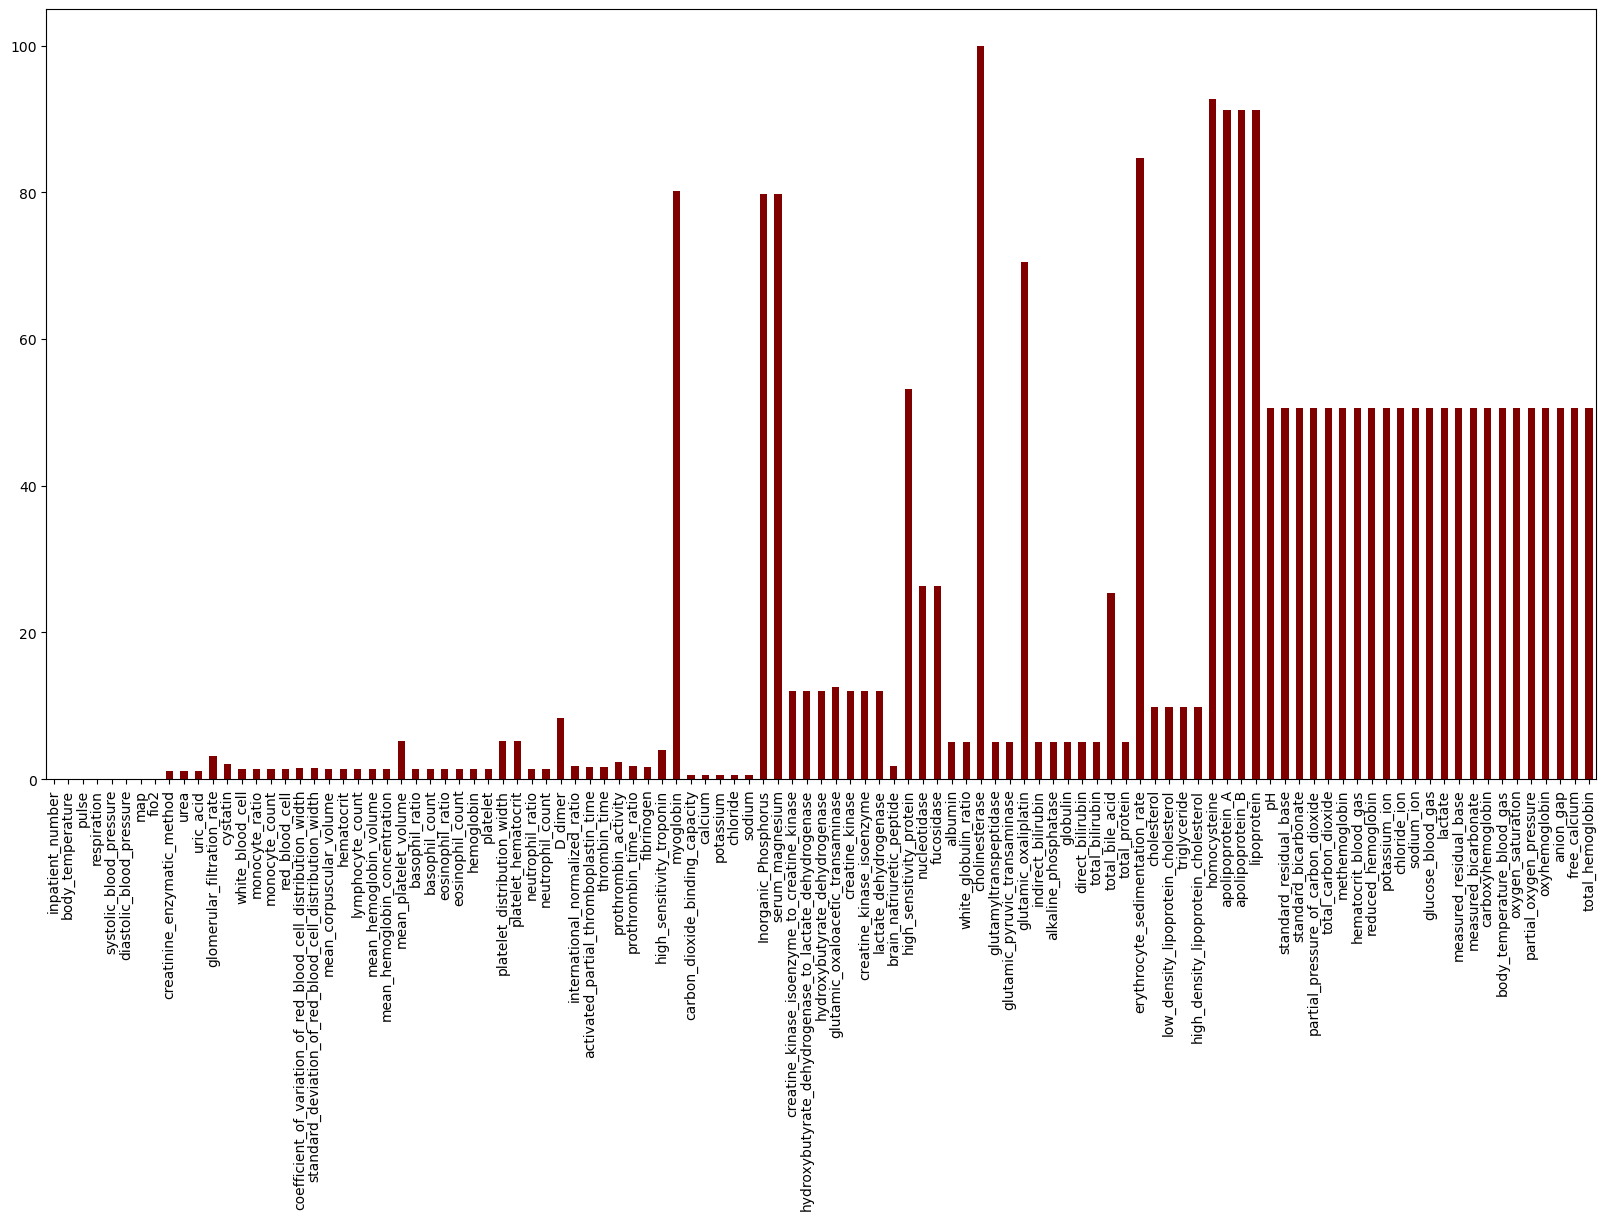

<Figure size 5000x100 with 0 Axes>

In [38]:
plt.figure(figsize=(20,10))
missing_percent.plot(kind='bar',color='maroon')
plt.figure(figsize=(20,1)).set_figwidth(50)
plt.show()

#### *Comment-- Percentage of missing values shown here*

# 11.A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.{2,9587456281,1252478965,7397260044}

In [39]:
phone_numbers = {2,9587456281,1252478965,7397260044}
    
for phone_number in phone_numbers:
    if len(str(phone_number)) == 10:
        if str(phone_number)[0] in ['7','8','9']:
          print(str(phone_number) +': YES' )
        else:
           print(str(phone_number) + ': NO' )
    else:
       print(str(phone_number) + ': NO' )

9587456281: YES
2: NO
7397260044: YES
1252478965: NO


# 12.If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [40]:
left_data=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="CardiacComplications")
#### Filtering people with abnormal ranges.

data= left_data[(left_data['left_ventricular_end_diastolic_diameter_LV']<3.5) | (left_data['left_ventricular_end_diastolic_diameter_LV']>5.6)]
data.count().iloc[0]



1311

#### The number of people in the abnormal ranges of left ventricular end diastolic diamete are 1311

In [41]:
mapp=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs",usecols="A,G")

# merging the data to get map value

merged_jp1=pd.merge(mapp[['inpatient_number','map']],data[['inpatient_number','left_ventricular_end_diastolic_diameter_LV']])


In [42]:
# mean function is used to get the most patient's value 

merged_jp1['map'].mean()


96.21459445715739

#### *Comment--Map value of abnormal range people is 96.21*


# 13.Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

In [43]:
x=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs")
y=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")
merged_jp=pd.merge(x[['inpatient_number','body_temperature']],y[['inpatient_number','dischargeDay']])
merged_jp.head(3)


inpatient_number  body_temperature  dischargeDay
0            857781              36.7            11
1            743087              36.8             8
2            866418              36.5             5

In [44]:
x['Temp_ranges']= x.body_temperature.apply( 
    lambda x: 'hypothermia' if x<35 
    else 'within_range' if x>=35 and x<=37.8
    else 'Hyperthermia' if x>37.8 
    else ' ')
x['Temp_ranges'].value_counts()

Temp_ranges
within_range    1970
Hyperthermia      38
Name: count, dtype: int64

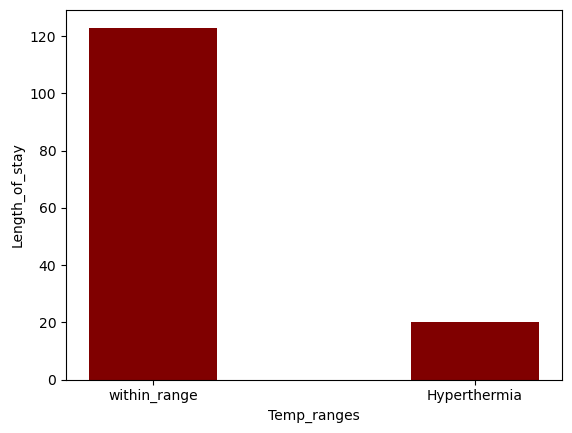

In [45]:
x_axis = x['Temp_ranges'] 
y_axis = y['dischargeDay'] 
plt.bar(x_axis, y_axis,color='maroon',width=0.4) 
plt.xlabel("Temp_ranges") 
plt.ylabel("Length_of_stay") 
plt.show()

#### *Comment--length of stay vs Hypothermia,within Range,hyperthermia. There are no hyperthermia patients in the dataset* 

# 14.Find the list of patients whose DischargeDay is greater than the value given by the user

In [46]:
userInputDay = int(input('disday='))
data = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
disPatient = data[['inpatient_number','dischargeDay']]
disPatient = disPatient[disPatient.dischargeDay>userInputDay]
disPatient.head()

disday= 6


inpatient_number  dischargeDay
0            857781            11
1            743087             8
3            775928            11
6            844094            10
7            787530            27

#### *Comment-- when you give any number...it will give you the discharge day list of patients which are greater than the user*

# 15.Display a pie chart of number of patients in each category listed-death_within_28_days -re_admission_within_28_days -death_within_3_months -re_admission_within_3_months -death_within_6_months -re_admission_within_6_months -return_to_emergency_department_within_6_months

In [47]:
data= pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Hospitalization_Discharge', usecols= 'L:Q,T')
data1= data.sum()
data1


death_within_28_days                               37.0
re_admission_within_28_days                       140.0
death_within_3_months                              42.0
re_admission_within_3_months                      498.0
death_within_6_months                              57.0
re_admission_within_6_months                      773.0
return_to_emergency_department_within_6_months    775.0
dtype: float64

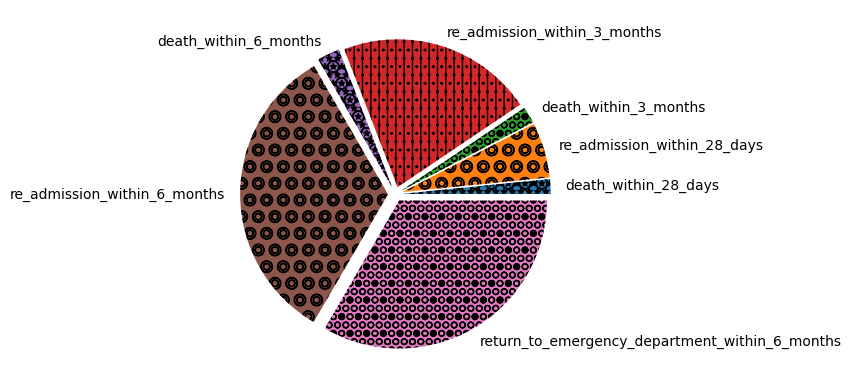

In [48]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(data1,labels=data1.index,explode=explode, hatch=['**O', 'oO', 'O.O', '.||.'])
plt.show()

#### *Comment-- return_to_emergency_department_within_6_months having more patients when compared to other categories*

# 16. Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [49]:
Pivot3= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="CardiacComplications", usecols='A,D,E,F')
Pivot2= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography", usecols='A,E')
Pivot4= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Labs", usecols='A,K')
Pivot1 = pd.merge(Pivot3[['inpatient_number','myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease']],Pivot2[['inpatient_number','BMI']])
Pivot= pd.merge(Pivot1[['inpatient_number','myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease','BMI']],Pivot4[['inpatient_number','uric_acid']])
Pivot.head(2)                                                                                                                                   

inpatient_number  myocardial_infarction  congestive_heart_failure  \
0            857781                      0                         0   
1            743087                      0                         0   

   peripheral_vascular_disease        BMI  uric_acid  
0                            0  18.590125      685.0  
1                            0  19.195303      170.0

In [50]:
melt= pd.melt(Pivot, id_vars=['myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease'], 
              value_vars=['uric_acid', 'BMI'], ignore_index=True, value_name= "Average",var_name ='Uric acid & BMI')
melt

myocardial_infarction  congestive_heart_failure  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
4011                      0                         1   
4012                      0                         1   
4013                      0                         1   
4014                      0                         1   
4015                      0                         1   

      peripheral_vascular_disease Uric acid & BMI     Average  
0                               0       uric_acid  685.000000  
1                               0       uric_acid  170.000000  
2                               0       uric_acid  567.000000  
3                               0       uric_acid  635.000000  
4                               0       uric_acid  432.000000  
...                           ...             ...         ...  
4011                            0             BMI   15.555556  
4012                            0             BMI   20.811655  
4013                            0             BMI   25.951557  
4014                            0             BMI   17.777778  
4015                            0             BMI   18.730489  

[4016 rows x 5 columns]

In [51]:
pivot_t=pd.pivot_table(melt,index='Uric acid & BMI', aggfunc='mean')
pivot_t

Average  congestive_heart_failure  myocardial_infarction  \
Uric acid & BMI                                                                
BMI               21.791398                  0.932271               0.071215   
uric_acid        483.018640                  0.932271               0.071215   

                 peripheral_vascular_disease  
Uric acid & BMI                               
BMI                                 0.050299  
uric_acid                           0.050299

#### *Comment--Pivot Table is shown here*

# 17. Using arrays and loops find the number of patients who were Admitted in the month of November

In [52]:
data= pd.read_excel('Cardiac_outcomes.xlsx')

data.head(2)


inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1                 NaN     OxygenTherapy   

   dischargeDay Admission_date  ... death_within_28_days  \
0            11     2017-01-24  ...                    0   
1             8     2017-05-05  ...                    0   

   re_admission_within_28_days  death_within_3_months  \
0                            0                      0   
1                            0                      0   

   re_admission_within_3_months  death_within_6_months  \
0                             0                      0   
1                             0                      0   

   re_admission_within_6_months  time_of_death__days_from_admission  \
0                             0                                 NaN   
1                             0                                 NaN   

   readmission_time_days_from_admission  \
0                                   NaN   
1                                   NaN   

   return_to_emergency_department_within_6_months  \
0                                             0.0   
1                                             0.0   

   time_to_emergency_department_within_6_months  
0                                           NaN  
1                                           NaN  

[2 rows x 21 columns]

In [53]:
data["Month"]= data["Admission_date"].dt.month
data.head(2)

inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1                 NaN     OxygenTherapy   

   dischargeDay Admission_date  ... re_admission_within_28_days  \
0            11     2017-01-24  ...                           0   
1             8     2017-05-05  ...                           0   

   death_within_3_months  re_admission_within_3_months  death_within_6_months  \
0                      0                             0                      0   
1                      0                             0                      0   

   re_admission_within_6_months  time_of_death__days_from_admission  \
0                             0                                 NaN   
1                             0                                 NaN   

   readmission_time_days_from_admission  \
0                                   NaN   
1                                   NaN   

   return_to_emergency_department_within_6_months  \
0                                             0.0   
1                                             0.0   

   time_to_emergency_department_within_6_months  Month  
0                                           NaN      1  
1                                           NaN      5  

[2 rows x 22 columns]

In [54]:
Number_of_patients= 0
for x in data.Month:
   if x==11:
       Number_of_patients +=1

print(Number_of_patients)


195


##### *Comment - Number of patients who were admitted in the month of November are 195      (Q17)*


# 18.Create a heatmap on any columns of your choice including at least 1 lab value

In [55]:
import seaborn as sns
demo= pd.read_excel('Cardiac_outcomes.xlsx',  sheet_name ='Demography', usecols='A,B,G')
lab= pd.read_excel('Cardiac_outcomes.xlsx',  sheet_name ='Labs', usecols='A,H')
Merge = pd.merge(demo[["inpatient_number","gender","ageCat"]],lab[["inpatient_number","fio2"]])


<Axes: xlabel='ageCat', ylabel='gender'>

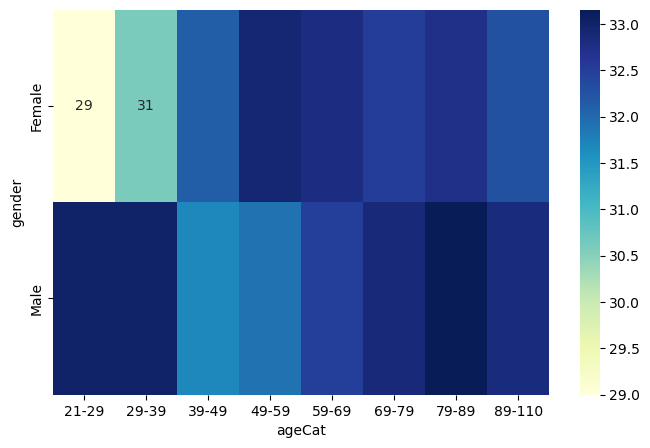

In [56]:
plt.figure(figsize=(8,5))
HM=Merge.pivot_table(index= 'gender', columns='ageCat', values = 'fio2')
sns.heatmap(HM,cmap='YlGnBu',linecolor='white', annot=True)

#### Comment According to the heatmap, Male patients are having higher fio2 values compared to females. 
#### And, Among, Male's age category 79-89 have high values.

# 19. Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

In [57]:
Demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography", usecols= "A,E,F")
Demo.head(2)
# filling occupation nan to unknown for better understanding
Demo = Demo.fillna({'occupation':'unknown'})

#### Calculation of Avg BMI and changing to list

In [58]:
AvgBMI = Demo.groupby('occupation')['BMI'].mean()
Avg_BMI= round(AvgBMI,2)
Avg_BMI_list= Avg_BMI.values.tolist()
Avg_BMI_list

[21.94, 21.07, 21.76, 22.48, 21.1, 21.17]

#### Making a list of unique values of occupation

In [59]:
Occ_list= Demo.occupation.values.tolist()
Occ_list_Unique1 = np.unique(Occ_list)
Occ_list_Unique= Occ_list_Unique1.tolist()
Occ_list_Unique

['Officer', 'Others', 'UrbanResident', 'farmer', 'unknown', 'worker']

#### BAR CHART

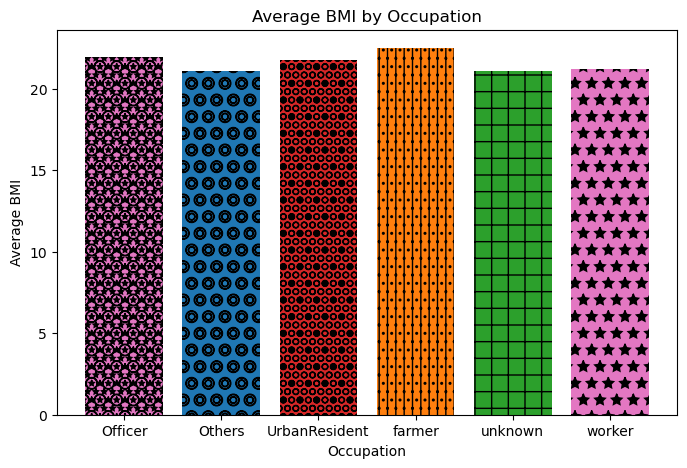

In [60]:
fig = plt.figure(figsize=(8,5))
bar_colors = ['tab:pink', 'tab:blue', 'tab:red', 'tab:orange','tab:green']
plt.bar(Occ_list_Unique,Avg_BMI_list,color= bar_colors, hatch=['**O', 'oO', 'O.O', '.||.','+','*'] )
plt.xlabel("Occupation")
plt.ylabel("Average BMI")
plt.title("Average BMI by Occupation")
plt.show()

# 20. You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
# Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
# x=1, y=1, z=2, n=3

In [61]:
x = 1
y = 1
z = 2
n = 3

coordinates= [ [ i, j, k] for i in range( x + 1) 
              for j in range( y + 1)
              for k in range ( z + 1 )
              if ( ( i + j + k ) != n )]
print(coordinates)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


##### *Comment - The possible coordinates (i,j,k) for the given conditions are [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]  (Q20)*

# 21. Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade. python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]'''

In [62]:
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
Score_order = sorted(python_students, key=lambda x: x[1])
print (Score_order)


[['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]


In [63]:
second_lowest= [Score_order[1][1]]
print(second_lowest)

[37.21]


In [64]:
second_lowest_students = [Score_order[1][0]]
for i in range (1, len(python_students)):
  if second_lowest == [python_students[i][1]]:
   second_lowest_students.append(python_students[i][0]) 
print(second_lowest_students)

['Harry', 'Berry']


##### *Comment - The student names who scored the second lowest grade are Harry and Berry (Q21)*

# 22. Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [65]:
Sheets= ['Patient_Precriptions','Hospitalization_Discharge', 'Demography' ]
Combined = pd.concat([pd.read_excel('Cardiac_outcomes.xlsx', sheet_name = sheet) for sheet in Sheets], ignore_index=True)
Combined.head(2)

inpatient_number                         Drug_name DestinationDischarge  \
0            857781  sulfotanshinone sodium injection                  NaN   
1            857781                 Furosemide tablet                  NaN   

  admission_ward admission_way discharge_department  visit_times  \
0            NaN           NaN                  NaN          NaN   
1            NaN           NaN                  NaN          NaN   

  respiratory_support oxygen_inhalation  dischargeDay  ...  \
0                 NaN               NaN           NaN  ...   
1                 NaN               NaN           NaN  ...   

  time_of_death__days_from_admission readmission_time_days_from_admission  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   

   return_to_emergency_department_within_6_months  \
0                                             NaN   
1                                             NaN   

   time_to_emergency_department_within_6_months  gender  weight  height  BMI  \
0                                           NaN     NaN     NaN     NaN  NaN   
1                                           NaN     NaN     NaN     NaN  NaN   

   occupation  ageCat  
0         NaN     NaN  
1         NaN     NaN  

[2 rows x 28 columns]

In [66]:
Combined.inpatient_number.value_counts()

inpatient_number
777204    18
782683    17
746487    17
766722    17
801689    17
          ..
796480     3
753570     3
788087     3
829624     3
789308     2
Name: count, Length: 2010, dtype: int64

#### We could see here that the patient id 777204 has got the high number of prescribed drug

In [67]:
Highest_prescription = Combined.groupby('inpatient_number').get_group(777204)
Highest_prescription.loc[:,["inpatient_number",'outcome_during_hospitalization', 'ageCat',"Drug_name"]]

Highest_prescription.outcome_during_hospitalization = Highest_prescription.outcome_during_hospitalization.fillna('')
Highest_prescription.outcome_during_hospitalization
Highest_prescription.ageCat = Highest_prescription.ageCat.fillna('')
Highest_prescription.loc[:,["inpatient_number",'outcome_during_hospitalization', 'ageCat',"Drug_name"]]

/var/folders/x9/dnp4ms7s2n18gv4j4n5h1tgw0000gn/T/ipykernel_47677/3277602456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Highest_prescription.outcome_during_hospitalization = Highest_prescription.outcome_during_hospitalization.fillna('')
/var/folders/x9/dnp4ms7s2n18gv4j4n5h1tgw0000gn/T/ipykernel_47677/3277602456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Highest_prescription.ageCat = Highest_prescription.ageCat.fillna('')


inpatient_number outcome_during_hospitalization ageCat  \
5496             777204                                         
5497             777204                                         
5498             777204                                         
5499             777204                                         
5500             777204                                         
5501             777204                                         
5502             777204                                         
5503             777204                                         
5504             777204                                         
5505             777204                                         
5506             777204                                         
5507             777204                                         
5508             777204                                         
5509             777204                                         
5510             777204                                         
5511             777204                                         
16094            777204                          Alive          
18102            777204                                 79-89   

                                              Drug_name  
5496                        Enoxaparin Sodium injection  
5497   Meglumine Adenosine Cyclophosphate for injection  
5498                                   Shenfu injection  
5499                                  Furosemide tablet  
5500                              Spironolactone tablet  
5501                                Milrinone injection  
5502               Isoprenaline Hydrochloride injection  
5503                              Deslanoside injection  
5504                                     Digoxin tablet  
5505                               Furosemide injection  
5506                        Atorvastatin calcium tablet  
5507    Isosorbide Mononitrate Sustained Release tablet  
5508                       Valsartan Dispersible tablet  
5509               Clopidogrel Hydrogen Sulphate tablet  
5510                                  Torasemide tablet  
5511                      Aspirin enteric-coated tablet  
16094                                               NaN  
18102                                               NaN

#### Patient number 777204 belong to age category 79-89 and the outcome is Alive

# 23.How many patients were prescribed Digoxin?

In [68]:
Prescriptions= pd.read_excel('Cardiac_outcomes.xlsx',  sheet_name = "Patient_Precriptions")
Prescriptions.head(2)

inpatient_number                         Drug_name
0            857781  sulfotanshinone sodium injection
1            857781                 Furosemide tablet

In [69]:
Prescriptions.Drug_name.value_counts()

Drug_name
Spironolactone tablet                               1833
Furosemide injection                                1720
Furosemide tablet                                   1641
Meglumine Adenosine Cyclophosphate for injection    1115
Deslanoside injection                               1017
Digoxin tablet                                       999
Aspirin enteric-coated tablet                        958
Atorvastatin calcium tablet                          822
Milrinone injection                                  709
sulfotanshinone sodium injection                     570
Metoprolol Succinate Sustained-release tablet        523
Benazepril hydrochloride tablet                      434
Clopidogrel Hydrogen Sulphate tablet                 401
Valsartan Dispersible tablet                         348
Shenfu injection                                     338
Isosorbide Mononitrate Sustained Release tablet      326
metoprolol tartrate injection                        307
Hydrochlorothiazide t

In [70]:
Drug = ["Digoxin tablet"]
Prescriptions[Prescriptions.Drug_name.isin(Drug)].nunique()


inpatient_number    999
Drug_name             1
dtype: int64

#### 999 patients have been prescribed with Digoxin tablet

# 24. What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

In [71]:
labs= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs",usecols = "A,AD,U,Q,T,W,X,CM,CN,DC")
LOS = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge", usecols= "A,I")

In [72]:
Merge = pd.merge (labs[['inpatient_number','hemoglobin','hematocrit','red_blood_cell','mean_corpuscular_volume','mean_hemoglobin_volume','mean_hemoglobin_concentration','hematocrit_blood_gas','reduced_hemoglobin','total_hemoglobin']],LOS[['inpatient_number','dischargeDay']])
Merge.head(2)

inpatient_number  hemoglobin  hematocrit  red_blood_cell  \
0            857781       131.0       0.387            4.09   
1            743087       114.0       0.349            3.93   

   mean_corpuscular_volume  mean_hemoglobin_volume  \
0                     94.5                    32.0   
1                     88.6                    28.9   

   mean_hemoglobin_concentration  hematocrit_blood_gas  reduced_hemoglobin  \
0                          338.0                  37.0                 3.4   
1                          326.0                   NaN                 NaN   

   total_hemoglobin  dischargeDay  
0             125.0            11  
1               NaN             8

#### Main columns used in classifying the anemia are the following -hemoglobin,hematocrit, red blood cell, mean corpuscular volume, mean hemoglobin volume (MCHC), mean hemoglobin concentration (MHC), 
#### hematocrit blood gas - it is a lab test done in ICU to get the hematocrit levels which in turn is associated with anemia.

In [73]:
Merge[['hemoglobin','hematocrit','red_blood_cell','mean_corpuscular_volume','mean_hemoglobin_volume','mean_hemoglobin_concentration','hematocrit_blood_gas','reduced_hemoglobin','total_hemoglobin']]


hemoglobin  hematocrit  red_blood_cell  mean_corpuscular_volume  \
0          131.0       0.387            4.09                     94.5   
1          114.0       0.349            3.93                     88.6   
2          144.0       0.427            4.43                     96.4   
3           94.0       0.277            2.71                    102.2   
4          120.0       0.378            4.20                     90.0   
...          ...         ...             ...                      ...   
2003       126.0       0.382            4.39                     87.0   
2004        99.0       0.337            4.19                     80.4   
2005       178.0       0.508            5.75                     88.4   
2006       133.0       0.386            4.05                     95.3   
2007       116.0       0.362            4.04                     89.6   

      mean_hemoglobin_volume  mean_hemoglobin_concentration  \
0                       32.0                          338.0   
1                       28.9                          326.0   
2                       32.6                          339.0   
3                       34.7                          339.0   
4                       28.6                          317.0   
...                      ...                            ...   
2003                    28.6                          329.0   
2004                    23.6                          294.0   
2005                    30.9                          349.0   
2006                    32.8                          344.0   
2007                    28.7                          320.0   

      hematocrit_blood_gas  reduced_hemoglobin  total_hemoglobin  
0                     37.0                 3.4             125.0  
1                      NaN                 NaN               NaN  
2                      NaN                 NaN               NaN  
3                      NaN                 NaN               NaN  
4                      NaN                 NaN               NaN  
...                    ...                 ...               ...  
2003                   NaN                 NaN               NaN  
2004                   NaN                 NaN               NaN  
2005                   NaN                 NaN               NaN  
2006                  41.0                 3.9             139.0  
2007                   NaN                 NaN               NaN  

[2008 rows x 9 columns]

#### As anemia means low levels of red blood cell, hemoglobin, mean hemoglobin concentration, mean hemoglobin volume, mean corpuscular volume and hematocrit.

#### I have scored below the normal range of the variables as 2 and higher than normal range as 1 and normal range as 0

In [74]:
# Scoring for Mean_hemoglobin concentration
Merge['MHC'] = Merge.mean_hemoglobin_concentration.apply(
    lambda x: 1 if x>360 else 
    0 if x >=320 and x<=360 else 
    2 if x < 320
    else " " )
Merge.MHC.value_counts()
Merge['MHC'] = pd.to_numeric(Merge['MHC'], downcast='integer', errors='coerce')

In [75]:
# Scoring for hemoglobin 
Merge['Hb_score'] = Merge.hemoglobin.apply(
    lambda x: 1 if x>175 else 
    0 if x >=130 and x<=175 else 
    2 if x < 130
    else " " )
Merge.Hb_score.value_counts()
Merge['Hb_score'] = pd.to_numeric(Merge['Hb_score'], downcast='integer', errors='coerce')

In [76]:
# Scoring mean hemoglobin volume
Merge['MCHC'] = Merge.mean_hemoglobin_volume.apply(
    lambda x: 1 if x>27 else 
    0 if x >=27 and x<=35 else 
    2 if x < 27
    else " " )
Merge.MCHC.value_counts()
Merge['MCHC'] = pd.to_numeric(Merge['MCHC'], downcast='integer', errors='coerce')

In [77]:
# Scoring for hematocrit 
Merge['Hemot'] = Merge.hematocrit.apply(
    lambda x: 1 if x>0.5 else 
    0 if x >=0.35 and x<=0.50 else 
    2 if x < 0.35
    else " " )
Merge.Hemot.value_counts()
Merge['Hemot'] = pd.to_numeric(Merge['Hemot'], downcast='integer', errors='coerce')

In [78]:
# Scoring Red blood cell
Merge['RBC'] = Merge.red_blood_cell.apply(
    lambda x: 1 if x>5.5 else 
    0 if x >=3.5 and x<=5.5 else 
    2 if x < 3.5
    else " " )
Merge.RBC.value_counts()
Merge['RBC'] = pd.to_numeric(Merge['RBC'], downcast='integer', errors='coerce')

In [79]:
# Scoring Mean corpuscular volume 
Merge['MCV'] = Merge.mean_corpuscular_volume.apply(
    lambda x: 1 if x>0.5 else 
    0 if x >=0.35 and x<=0.50 else 
    2 if x < 0.35
    else " " )
Merge.Hemot.value_counts()
Merge['MCV'] = pd.to_numeric(Merge['MCV'], downcast='integer', errors='coerce')

## Correlation 

In [80]:
Merge['Severity_score']= Merge.loc[:,['Hb_score','Hemot','MCHC','MHC','RBC','MCV']].sum(axis=1)
Merge.Severity_score.value_counts()

Severity_score
2.0     482
4.0     435
8.0     309
6.0     283
10.0    179
9.0     108
11.0     77
7.0      65
5.0      29
0.0      28
3.0      13
Name: count, dtype: int64

#### Range of score is from 0 to 11 highest indicating low levels of all variables.

In [81]:
Correlation = Merge[['Severity_score','dischargeDay']]
print(round(Correlation.corr(),2))

                Severity_score  dischargeDay
Severity_score            1.00          0.09
dischargeDay              0.09          1.00


#### slight positive correlation is seen between the Anemia severity score and Length of stay

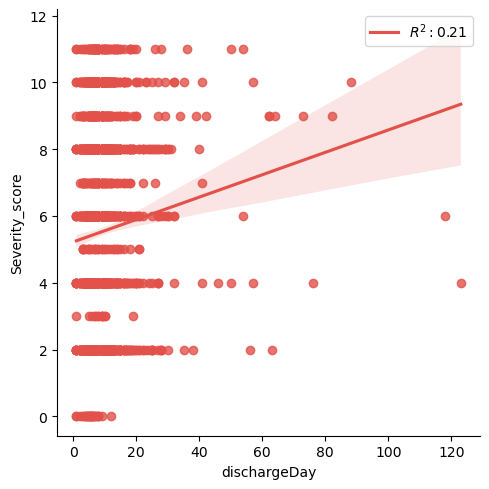

In [82]:
from scipy import stats

with sns.color_palette("Spectral"):
 p= sns.lmplot(x="dischargeDay", y="Severity_score",data= Merge,line_kws={'label':"Linear Reg"}, legend=True)

ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()

slope, intercept, r_value, p_value, std_err = stats.linregress(Merge["dischargeDay"],Merge["Severity_score"])

label_line_1 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
L_labels[0].set_text(label_line_1)


#### Comment -if we look at the Anemia severity score and length of stay correlation, graph they are positively correlated (correlation coefficient= 0.09) as Score was increases,days increased. 

# 25 Using GCS score, how many patients are considered to be in a coma?

In [83]:
GCS_data= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Responsivenes")
GCS_data.head(2)

inpatient_number  eye_opening  verbal_response  movement consciousness  GCS
0            857781            4                5         6         Clear   15
1            743087            4                5         6         Clear   15

In [84]:
GCS_data['Coma_scale']= GCS_data.GCS.apply( 
    lambda x: 'No_coma_best_response' if x >=13 and x<=15
    else 'Comatose patient' if x>=9 and x<=12 
    else 'Coma_Totally_unresponsive' if x>=3 and x<=8 
    else ' ')
GCS_data['Coma_scale'].value_counts()

Coma_scale
No_coma_best_response        1960
Comatose patient               29
Coma_Totally_unresponsive      19
Name: count, dtype: int64

#### comatose patients are also coma patients who may or may not recover. Hence, I am inculding them in the coma count

In [85]:
GCS_data['Coma']= GCS_data.GCS.apply( 
    lambda x: 'No_coma' if x >=13 and x<=15
    else 'Coma' if x>=3 and x<=12
    else ' ')
GCS_data['Coma'].value_counts()

Coma
No_coma    1960
Coma         48
Name: count, dtype: int64

#### *Comment- Number of coma patients using GCS score are 48, Among them 19 are totally unresponsive. (comatose patients are also coma patients who may or may not recover. Hence, I am inculding them in the coma count)*

# 26 Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [86]:
Demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography", usecols= "A,G")
Demo.head(2)

inpatient_number ageCat
0            857781  69-79
1            743087  69-79

In [87]:
def Random_age(ageCat):
    Age_U, Age_L = map(int, ageCat.split('-'))
    return np.random.randint(Age_U, Age_L)

Demo['Age'] = Demo['ageCat'].apply(Random_age)

In [88]:
Age_Average = Demo.Age.mean()
Age_Average= round(Age_Average)
Age_Average
Demo.head(2)

inpatient_number ageCat  Age
0            857781  69-79   73
1            743087  69-79   71

#### Comment- Random age is generated and its Average is taken using split method and map

# 27. Using the age column generated in Q.26, calculate year of birth for each patient

In [89]:
from datetime import datetime
Demo['year_of_birth'] = datetime.now().year - Demo.Age
Demo.head(2)

inpatient_number ageCat  Age  year_of_birth
0            857781  69-79   73           1951
1            743087  69-79   71           1953

#### Comment- Year of birth of the patients have been calculated using datetime module

# 28 Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [90]:
Demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography", usecols= "A,B")

Demo.head(2)

inpatient_number  gender
0            857781    Male
1            743087  Female

In [91]:
dict_Demo = Demo.set_index('inpatient_number')['gender'].to_dict()
dict_Demo

{857781: 'Male',
 743087: 'Female',
 866418: 'Male',
 775928: 'Male',
 810128: 'Female',
 823318: 'Female',
 844094: 'Male',
 787530: 'Female',
 795420: 'Female',
 829801: 'Female',
 807741: 'Female',
 748109: 'Female',
 802296: 'Male',
 744167: 'Male',
 780534: 'Female',
 852562: 'Female',
 759947: 'Male',
 825016: 'Female',
 820101: 'Female',
 729522: 'Male',
 764082: 'Female',
 765801: 'Female',
 868777: 'Female',
 821261: 'Female',
 814869: 'Male',
 818671: 'Female',
 846186: 'Female',
 818948: 'Female',
 764380: 'Male',
 861240: 'Male',
 743467: 'Female',
 814480: 'Female',
 783621: 'Female',
 766383: 'Female',
 848044: 'Male',
 821472: 'Female',
 866373: 'Female',
 793147: 'Female',
 739615: 'Male',
 817939: 'Female',
 760822: 'Female',
 831189: 'Female',
 837384: 'Male',
 798240: 'Male',
 857297: 'Male',
 727376: 'Female',
 865365: 'Female',
 859976: 'Male',
 806646: 'Female',
 862491: 'Female',
 858732: 'Female',
 870127: 'Female',
 763014: 'Male',
 814592: 'Female',
 742279: '

In [92]:
import itertools 
N=10
First_ten = dict(itertools.islice(dict_Demo.items(), N)) 
print ("First ten values of dictionary are " + str(First_ten))

First ten values of dictionary are {857781: 'Male', 743087: 'Female', 866418: 'Male', 775928: 'Male', 810128: 'Female', 823318: 'Female', 844094: 'Male', 787530: 'Female', 795420: 'Female', 829801: 'Female'}


#### Comment - Dataframe turned to dictionary using to_dict() and ten values were extracted using itertools

# 29 What percentage of those in a coma also have diabetes?

In [93]:
GCS_data= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Responsivenes")
GCS_data.head(2)

inpatient_number  eye_opening  verbal_response  movement consciousness  GCS
0            857781            4                5         6         Clear   15
1            743087            4                5         6         Clear   15

In [94]:
Diabetes= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="PatientHistory", usecols= "A,G")
Diabetes.head(2)

inpatient_number  diabetes
0            857781         1
1            743087         0

In [95]:
GCS_diabetes= pd.merge(GCS_data[["inpatient_number","GCS"]], Diabetes[["inpatient_number","diabetes"]])
GCS_diabetes.head(2)


inpatient_number  GCS  diabetes
0            857781   15         1
1            743087   15         0

#### comatose patients are also coma patients who may or may not recover. Hence, I am inculding them in the coma count -
#### Total coma patients are 48 and 19 are totally unresponsive

In [96]:
GCS_diabetes['Coma']= GCS_diabetes.GCS.apply( 
    lambda x: 'No_coma' if x >=13 and x<=15
    else 'Coma' if x>=3 and x<=12
    else ' ')
GCS_diabetes.head(2)
GCS_diabetes.Coma.value_counts()

Coma
No_coma    1960
Coma         48
Name: count, dtype: int64

In [97]:
Condition = ["Coma"]
coma_patients = GCS_diabetes[GCS_diabetes.Coma.isin(Condition)]

diabetes= GCS_diabetes.loc[(GCS_diabetes['diabetes']== 1) & (GCS_diabetes.Coma.isin(Condition))]
diabetes_count= diabetes.count().iloc[2]
diabetes_count

8

In [98]:
coma_count= coma_patients.count().iloc[3]
coma_count

48

In [99]:
Diabetes_percentage= (diabetes_count*100)/coma_count
print ("Percentage of coma patients who are diabetic is " + str(round(Diabetes_percentage,2)) + "%")

Percentage of coma patients who are diabetic is 16.67%


#### b. Percentage of patients who are in coma and totally unresponsive and diabetic

In [100]:
GCS_diabetes['Coma_scale']= GCS_diabetes.GCS.apply( 
    lambda x: 'No_coma_best_response' if x >=13 and x<=15
    else 'Comatose patient' if x>=9 and x<=12 
    else 'Coma_Totally_unresponsive' if x>=3 and x<=8 
    else ' ')


In [101]:
Condition1 = ["Coma_Totally_unresponsive"]
coma_unresponsive_patients = GCS_diabetes[GCS_diabetes.Coma_scale.isin(Condition1)]

In [102]:
diabetes_unresponsive_coma = GCS_diabetes.loc[(GCS_diabetes['diabetes']== 1) & (GCS_diabetes.Coma_scale.isin(Condition1))]
diabetes_unresponsive_coma_count = diabetes_unresponsive_coma.count().iloc[4]
diabetes_unresponsive_coma_count

2

In [103]:
coma_unresponsive_count= coma_unresponsive_patients.count().iloc[4]
coma_unresponsive_count

19

In [104]:
Diabetes_unresponsive_coma_percentage= (diabetes_unresponsive_coma_count*100)/coma_unresponsive_count
print ("Percentage of unresponsive coma patients who are diabetic is " + str(round(Diabetes_unresponsive_coma_percentage,2)) + "%")

Percentage of unresponsive coma patients who are diabetic is 10.53%


#### Percentage of patients in totally unresponsive coma and diabetic is 10.53%
#### Percentage of patients in coma (both comatose and totally unresponsive ) is 16.67%

# 30. Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [105]:
Cardiac = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="CardiacComplications")
Cardiac.head(2)

inpatient_number  NYHA_cardiac_function_classification  Killip_grade  \
0            857781                                     3             3   
1            743087                                     3             1   

   myocardial_infarction  congestive_heart_failure  \
0                      0                         0   
1                      0                         0   

   peripheral_vascular_disease type_of_heart_failure  LVEF  \
0                            0                  Both   NaN   
1                            0                  Both   NaN   

   left_ventricular_end_diastolic_diameter_LV  mitral_valve_EMS  \
0                                         NaN               NaN   
1                                        40.0              1.16   

   mitral_valve_AMS  EA  tricuspid_valve_return_velocity  \
0               NaN NaN                              NaN   
1              1.52 NaN                             3.34   

   tricuspid_valve_return_pressure  
0                              NaN  
1                             47.0

#### Echocardiography-A procedure that uses high-energy sound waves (ultrasound) to look at tissues and organs inside the chest. it helps in identifying dysfunctions of heart muscles and valves. the following column are the measures that can be obtained through the echocardiography.

In [106]:
Cardiac[['tricuspid_valve_return_velocity', 'mitral_valve_EMS','mitral_valve_AMS','left_ventricular_end_diastolic_diameter_LV','LVEF' ,'tricuspid_valve_return_pressure', 'EA']]


tricuspid_valve_return_velocity  mitral_valve_EMS  mitral_valve_AMS  \
0                                 NaN               NaN               NaN   
1                                3.34              1.16              1.52   
2                                2.80              0.84              0.12   
3                                 NaN               NaN               NaN   
4                                 NaN              1.20              0.90   
...                               ...               ...               ...   
2003                              NaN               NaN               NaN   
2004                             2.78               NaN               NaN   
2005                              NaN               NaN               NaN   
2006                              NaN               NaN               NaN   
2007                              NaN               NaN               NaN   

      left_ventricular_end_diastolic_diameter_LV  LVEF  \
0                                            NaN   NaN   
1                                           40.0   NaN   
2                                           46.0   NaN   
3                                            NaN   NaN   
4                                           64.0   NaN   
...                                          ...   ...   
2003                                         NaN   NaN   
2004                                         NaN   NaN   
2005                                         NaN   NaN   
2006                                         NaN   NaN   
2007                                         NaN   NaN   

      tricuspid_valve_return_pressure    EA  
0                                 NaN   NaN  
1                                47.0   NaN  
2                                32.0  7.00  
3                                 NaN   NaN  
4                                 NaN  1.33  
...                               ...   ...  
2003                              NaN   NaN  
2004                              NaN   NaN  
2005                              NaN   NaN  
2006                              NaN   NaN  
2007                              NaN   NaN  

[2008 rows x 7 columns]

#### Echocardiography can help in identifying heart failure - left and right ventricular failure,congentital heart failure Myocaridal infarction, severe cases of peripheral vascular diseases, congestive heart failure.the following are the columns of heart diseases that can be diagnosed using echocardiography

In [107]:
Cardiac[['myocardial_infarction','congestive_heart_failure', 'peripheral_vascular_disease', 'type_of_heart_failure']]

myocardial_infarction  congestive_heart_failure  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
2003                      0                         1   
2004                      0                         1   
2005                      0                         1   
2006                      0                         1   
2007                      0                         1   

      peripheral_vascular_disease type_of_heart_failure  
0                               0                  Both  
1                               0                  Both  
2                               0                  Both  
3                               0                  Both  
4                               0                  Both  
...                           ...                   ...  
2003                            0                  Both  
2004                            0                  Both  
2005                            0                  Both  
2006                            0                  Both  
2007                            0                  Left  

[2008 rows x 4 columns]

#### Left Ventricular Ejection Fraction, left.ventricular.end.diastolic.diameter.LV , EA are the variables that are considered to have effect on diagnosing heart failure hence, these columns are assumed to be responsible for determining cardic function and its severity.Hence severity score is calculated using these three columns

#### Tricuspid return valve pressure can be used to indicate pulmonary hypertension and tricuspid regurgitation. If tricuspid regurgitation is above 30mmHg, the patient has higher chances of pulmonary hypertension. 

 #### Assigning 0 for normal people and for values below normal range as 1 and values above the normal range as 2.

#### Normal ranges of the variables are below
#### left.ventricular.end.diastolic.diameter.LV (cm), normal range: 3.5 - 5.6 cm
#### E/A ratio, normal range: 0.6-1.32
#### Left Ventricular Ejection Fraction (%), normal range: 55% - 70%

In [108]:
# Assigning 0 for normal people and for values below normal range as 1 and values above the normal range as 2 in LVEF variable
Cardiac['LVEF_']= Cardiac.LVEF.apply(
    lambda x : 2 if x> 70 
    else 0 if x>=55 and x<=70
    else 1 if x < 55 
    else ' ')
Cardiac['LVEF_'] = pd.to_numeric(Cardiac['LVEF_'], downcast='integer', errors='coerce')

#Assigning 0 for normal people and for values below normal range as 1 and values above the normal range as 2 in EA variable 
Cardiac['EA_']=Cardiac.EA.apply(
     lambda x : 2 if x> 1.32
    else 0 if x>=0.6 and x<=1.32
    else 1 if x < 0.6
    else ' ')
Cardiac['EA_'] = pd.to_numeric(Cardiac['EA_'], downcast='integer', errors='coerce')

#Assigning 0 for normal people and for values below normal range as 1 and values above the normal range as 2 in left_ventricular_end_diastolic_diameter_LV variable
Cardiac['LVEDD']=Cardiac.left_ventricular_end_diastolic_diameter_LV.apply(
     lambda x : 2 if x> 5.6
    else 0 if x>=3.5 and x<=5.6
    else 1 if x < 3.5
    else ' ')
Cardiac['LVEDD'] = pd.to_numeric(Cardiac['LVEDD'], downcast='integer', errors='coerce')


#### Severity score is got by summing up the scores of created numeric variables of Left Ventricular Ejection Fraction, left_ventricular_end_diastolic_diameter, and EA

In [109]:
Cardiac['Severity_score']= Cardiac.loc[:,['LVEF_','LVEDD','EA_']].sum(axis=1)

#### Since, the normal range is categorized as 0 and low ranges as 1 and high ranges as 2, the higher the score, higher will be the cardiac severity.

In [110]:
Cardiac.Severity_score.describe()

count    2008.000000
mean        1.694721
std         1.384998
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Severity_score, dtype: float64

#### We could see from the describe function that the maximum score is 6 and minimum score is 0, So the range is (0,6)

## Compare this outcome and show average severity score for each outcome

#### Echocardiography outcomes i assume to be the reults of echocardiography, which in turn are cardiac conditions- Myocardial infarction, Congestive heart failure,Ventricular heart failure,and peripheral vascular disease

In [111]:
# Average severity score for Myocardial infarction
MI = Cardiac.loc[Cardiac['myocardial_infarction'] ==1]
MI.Severity_score.mean()

1.6223776223776223

In [112]:
# Average severity score for Congestive heart failure
CHF = Cardiac.loc[Cardiac['congestive_heart_failure'] ==1]
CHF.Severity_score.mean()

1.732905982905983

In [113]:
# Average severity score for Ventricular heart failure - Left
type =["Left"]
HFL = Cardiac.loc[Cardiac.type_of_heart_failure.isin(type)]
HFL.Severity_score.mean()

1.8679245283018868

In [114]:
# Average severity score for Ventricular heart failure - Right
type =["Right"]
HFR = Cardiac.loc[Cardiac.type_of_heart_failure.isin(type)]
HFR.Severity_score.mean()

1.9803921568627452

In [115]:
# Average severity score for Ventricular heart failure - Both
HFB = Cardiac.loc[Cardiac.type_of_heart_failure.isin(type)]
HFB.Severity_score.mean()

1.9803921568627452

In [116]:
PVD = Cardiac.loc[Cardiac['peripheral_vascular_disease'] ==1]
PVD.Severity_score.mean()

1.9108910891089108

#### Average Severity scores of Myocardial infarction is 1.62
#### Congestive heart failure is 1.73
#### Peripheral vascular disease is 1.86
#### Ventricular heart failure : Left = 1.98 ; Right= 1.98 ; Both = 1.91
#### We could see the score of Ventricular heart failure is higher when compared to others.

## The outcome of hospitalization variable is also used to check the average severity score of patients who are alive and dead.

In [117]:
hosp_outcome= pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Hospitalization_Discharge', usecols='A,K')
Cardiac1= pd.merge(hosp_outcome[['inpatient_number','outcome_during_hospitalization']],Cardiac[['inpatient_number','Severity_score']])


In [118]:
hospital_outcome = ['Alive']
Alive = Cardiac1.loc[Cardiac1.outcome_during_hospitalization.isin(hospital_outcome)]
Alive_mean_score=round((Alive.Severity_score.mean()),2)
Alive_mean_score

1.7

In [119]:
hospital_outcome = ['Dead']
Dead = Cardiac1.loc[Cardiac1.outcome_during_hospitalization.isin(hospital_outcome)]
Dead_mean_score= round((Dead.Severity_score.mean()),2)
Dead_mean_score

1.36

In [120]:
hospital_outcome = ['DischargeAgainstOrder']
Discharge = Cardiac1.loc[Cardiac1.outcome_during_hospitalization.isin(hospital_outcome)]
Discharge_mean_score= round((Discharge.Severity_score.mean()),2)
Discharge_mean_score

1.67

In [121]:
print ("The average severity score is slightly higher in Alive patients:" + str(Alive_mean_score) + " " + "; Discharge against order patients: " + str(Discharge_mean_score)
       + " " +"; Dead patients:" + str(Dead_mean_score))

The average severity score is slightly higher in Alive patients:1.7 ; Discharge against order patients: 1.67 ; Dead patients:1.36


#### The average severity score is slightly higher in Alive patients - 1.7 than Discharge against order patients 1.67, Dead patients 1.36

# 31. Group the days to re-admission into bins and count how many patients were in each bin

In [122]:
readm = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge", usecols ="A,S")
readm.head(2)

inpatient_number  readmission_time_days_from_admission
0            857781                                   NaN
1            743087                                   NaN

In [123]:
readm.readmission_time_days_from_admission.describe()

count     901.000000
mean      126.711432
std       145.025343
min         1.000000
25%        42.000000
50%        83.000000
75%       166.000000
max      2280.000000
Name: readmission_time_days_from_admission, dtype: float64

#### Number of bins is calculated according to the sturge's rule. Formula used k=1+log2(N)
#### k= number of bins and N = count of data points

In [124]:
import math
no_of_bins= round(1 + math.log2(readm.readmission_time_days_from_admission.count()))
no_of_bins

11

In [125]:
Bin_width = pd.cut(readm.readmission_time_days_from_admission, bins=no_of_bins, right=False)
patients = Bin_width.value_counts()
patients

readmission_time_days_from_admission
[1.0, 208.182)          739
[208.182, 415.364)      130
[415.364, 622.545)       21
[622.545, 829.727)        9
[829.727, 1036.909)       1
[2072.818, 2282.279)      1
[1036.909, 1244.091)      0
[1244.091, 1451.273)      0
[1451.273, 1658.455)      0
[1658.455, 1865.636)      0
[1865.636, 2072.818)      0
Name: count, dtype: int64

#### Comment = maximum number of patients have got readmitted within 208 days of their first admission.
#### Minimum number of patients have got readmitted within 830 to 2282 days of their first admission.

# 32. Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

In [126]:
combine = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge", usecols ="A,C,D")
combine .head(2)

inpatient_number admission_ward admission_way
0            857781     Cardiology  NonEmergency
1            743087     Cardiology  NonEmergency

In [127]:
combine['Combined'] = combine['admission_ward'] + "  " + combine['admission_way']
patients_number = combine.Combined.value_counts()
patients_number

Combined
Cardiology  NonEmergency     859
Cardiology  Emergency        688
GeneralWard  Emergency       195
Others  NonEmergency         121
GeneralWard  NonEmergency     70
Others  Emergency             60
ICU  Emergency                13
ICU  NonEmergency              2
Name: count, dtype: int64

#### Comment - Maximum number of patients are admitted in Cardiology NonEmergency - 859

# Pie chart

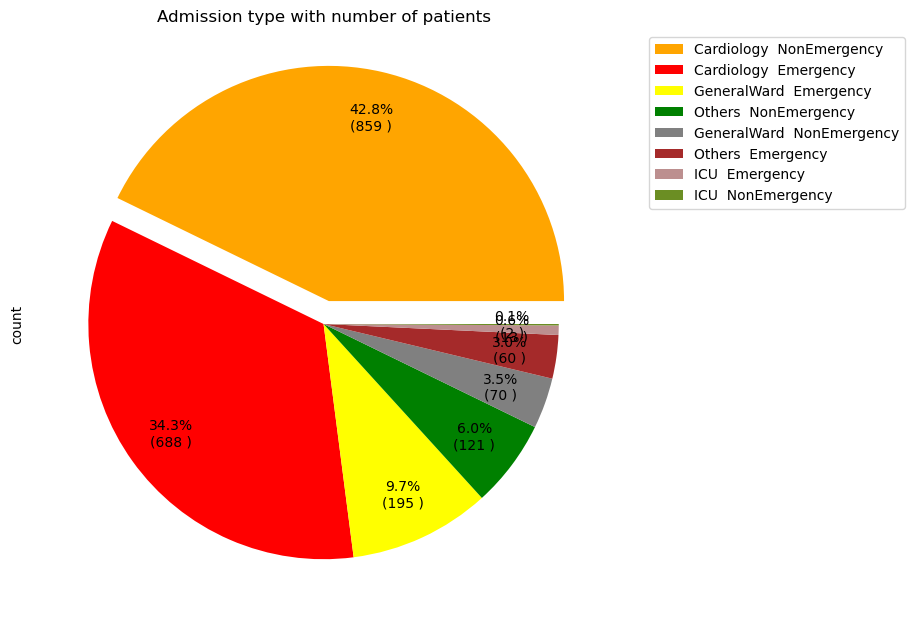

In [128]:
plt.style.use('_mpl-gallery-nogrid')
plt.figure(figsize=(8, 6))
plt.title( "Admission type with number of patients")
explode = (0.1,0,0,0,0,0,0,0) 
def func(pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} )"
    
x=patients_number.plot(kind='pie',  explode=explode, labeldistance=1, autopct= lambda pct: func(pct,patients_number), pctdistance=0.8,
                     colors=['orange','red','yellow','green','gray','brown','rosybrown','olivedrab'],textprops={'fontsize': 10} ,labels= None)
plt.legend(patients_number.index,loc='upper right',bbox_to_anchor=(1.5, 1)) 
plt.show()

#### *42.8% of the people highest percentage admitted in Cardiology Non emergency department*

# 33. Retrieve the row with minimum white_blood_cell count using sorting technique.

In [129]:
# reading data from Labs sheet
Lab_data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name ="Labs")

In [130]:
# to check if its read properly
Lab_data.head(2)

inpatient_number  body_temperature  pulse  respiration  \
0            857781              36.7     87           19   
1            743087              36.8     95           18   

   systolic_blood_pressure  diastolic_blood_pressure        map  fio2  \
0                      102                        64  76.666667    33   
1                      150                        70  96.666667    33   

   creatinine_enzymatic_method   urea  ...  measured_residual_base  \
0                        108.3  12.55  ...                    -2.1   
1                         62.0   4.29  ...                     NaN   

   measured_bicarbonate  carboxyhemoglobin  body_temperature_blood_gas  \
0                  21.2                0.4                        37.0   
1                   NaN                NaN                         NaN   

   oxygen_saturation  partial_oxygen_pressure  oxyhemoglobin  anion_gap  \
0               97.0                     93.0           95.9       17.8   
1                NaN                      NaN            NaN        NaN   

   free_calcium  total_hemoglobin  
0          1.14             125.0  
1           NaN               NaN  

[2 rows x 107 columns]

In [131]:
Lab_data.sort_values(by="white_blood_cell",inplace =True)

Lab_data.head(1)


inpatient_number  body_temperature  pulse  respiration  \
865            746068              37.1     71           20   

     systolic_blood_pressure  diastolic_blood_pressure    map  fio2  \
865                      130                        88  102.0    21   

     creatinine_enzymatic_method  urea  ...  measured_residual_base  \
865                         88.8  7.26  ...                    -2.6   

     measured_bicarbonate  carboxyhemoglobin  body_temperature_blood_gas  \
865                  21.6                0.3                        37.0   

     oxygen_saturation  partial_oxygen_pressure  oxyhemoglobin  anion_gap  \
865               97.0                     95.0           96.3       16.8   

     free_calcium  total_hemoglobin  
865          1.11              94.0  

[1 rows x 107 columns]

In [132]:
# to check min value for White Blood Cell
Lab_data['white_blood_cell']

865     1.66
1759    1.69
1448    1.69
50      1.82
299     2.14
        ... 
1872     NaN
1928     NaN
1982     NaN
1988     NaN
1990     NaN
Name: white_blood_cell, Length: 2008, dtype: float64

#### comment: Minimum White Blood Cell count of all the patients in dataset is 1.66

# 34. Get the last letter of discharge_department of patients using RegEX





In [133]:
import re
Discharge = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name ="Hospitalization_Discharge")
df = pd.DataFrame({'discharge_department': ['Cardiology', 'GeneralWard', 'ICU','Others']})

#selecting the column discharge_department
text_column = Discharge['discharge_department']

last_letter = text_column.str.extract(r'(\w)$')



print(last_letter)

      0
0     y
1     y
2     y
3     y
4     y
...  ..
2003  d
2004  d
2005  y
2006  y
2007  y

[2008 rows x 1 columns]


# 35. Find the way to reverse string for given input 
# (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)


In [134]:
def reverse_words(string):
    # splitting the string into list of words
    split_words = string.split()
    
    #create an empty string to store the reverse string
    reversed_string = ''
    
    # looping through the words in reverse order and append them to reverse string
    
    for i in range(len(split_words) -1, -1,-1):
        reversed_string+= split_words[i]+ ' '
        
    # remove the extra spce at the end of the reversed string and return it 
    return reversed_string.strip()

String = 'This hackathon is about cardiac outcomes'
reversed_string = reverse_words(String)
print(reversed_string)


outcomes cardiac about is hackathon This


## 36. Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() **
## ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
## ** Plot (x,y) on that axes and set the labels.



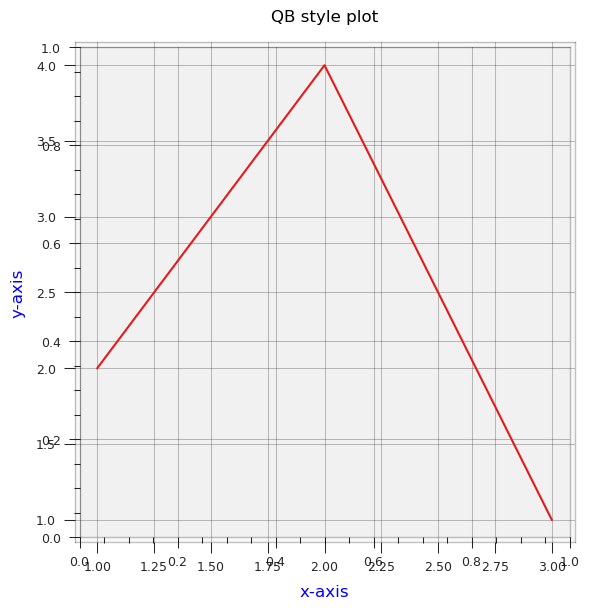

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from qbstyles import mpl_style

mpl_style(dark=False)

# create a multidimensional array 
multidimensional_array = np.random.randint(low=1, high=8, size=(3,3))

# Plot the figure

fig = plt.figure(figsize= (5,5))

x = [1,2,3]
y = [2,4,1]

# add axis at [0,0,1,1]
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(x,y)
axes.set_xlabel('x-axis',color='blue')
axes.set_ylabel('y-axis',color = 'blue')
axes.set_title('QB style plot')
  


plt.show()


## 37. Using dischargeDay values print even if it even number and odd if it odd number

In [140]:
Discharge_data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Hospitalization_Discharge")

In [141]:
def even_odd (dischargeDay):
    if dischargeDay %2 == 0:
        print(dischargeDay,"Even")
        
    else:
        print(dischargeDay,"Odd")

Discharge_data['odd_even']= Discharge_data['dischargeDay'].apply(even_odd)


11 Odd
8 Even
5 Odd
11 Odd
5 Odd
6 Even
10 Even
27 Odd
20 Even
4 Even
9 Odd
9 Odd
11 Odd
22 Even
8 Even
3 Odd
16 Even
14 Even
7 Odd
10 Even
5 Odd
11 Odd
7 Odd
9 Odd
9 Odd
8 Even
8 Even
5 Odd
11 Odd
7 Odd
7 Odd
10 Even
15 Odd
4 Even
9 Odd
6 Even
7 Odd
7 Odd
7 Odd
4 Even
3 Odd
5 Odd
8 Even
4 Even
9 Odd
9 Odd
11 Odd
19 Odd
6 Even
7 Odd
15 Odd
4 Even
18 Even
3 Odd
11 Odd
14 Even
12 Even
11 Odd
9 Odd
8 Even
7 Odd
2 Even
9 Odd
30 Even
8 Even
6 Even
3 Odd
5 Odd
21 Odd
8 Even
7 Odd
8 Even
5 Odd
5 Odd
5 Odd
7 Odd
10 Even
6 Even
10 Even
7 Odd
8 Even
11 Odd
9 Odd
15 Odd
7 Odd
5 Odd
7 Odd
6 Even
5 Odd
26 Even
11 Odd
3 Odd
7 Odd
7 Odd
2 Even
14 Even
12 Even
6 Even
10 Even
4 Even
9 Odd
9 Odd
8 Even
10 Even
5 Odd
7 Odd
13 Odd
8 Even
50 Even
8 Even
8 Even
6 Even
22 Even
5 Odd
5 Odd
5 Odd
9 Odd
4 Even
8 Even
8 Even
9 Odd
8 Even
5 Odd
18 Even
10 Even
6 Even
5 Odd
5 Odd
8 Even
8 Even
11 Odd
7 Odd
4 Even
7 Odd
10 Even
8 Even
9 Odd
15 Odd
18 Even
8 Even
1 Odd
6 Even
10 Even
6 Even
7 Odd
10 Even
7 Odd
18 Ev

## 38. find the length of Tuple for any given input (Hint: Input a string from user )

In [143]:

list_string = input('inputstring : ')
tuple_string = tuple(list_string)

print(tuple_string)

print(len(tuple_string))

inputstring :  hi


('h', 'i')
2


## 39.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

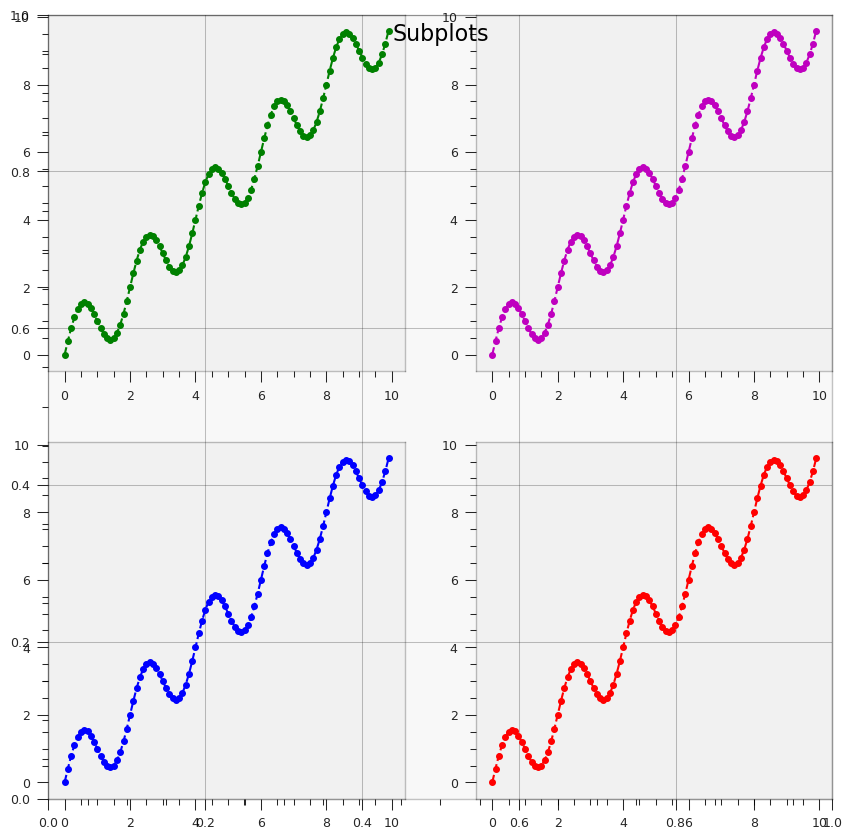

In [144]:

import numpy as np
import matplotlib.pyplot as plt

# Create the axis
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Create a figure and subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for ax in axs.flat:
    ax.grid(False)

# Plotting the data on the subplots

axs[0, 0].plot(x, y,'g--o')
axs[0, 1].plot(x, y,'m--o')
axs[1, 0].plot(x, y,'b--o')
axs[1, 1].plot(x, y,'r--o')

# main heading to the subplots
plt.suptitle("Subplots",fontsize= 16)

plt.show()

## 40. Select 25 different random values between 200 to 800.


In [145]:
import random

mylist = []

for i in range(0,25):
    x = random.randint(200,800)
    mylist.append(x)

print(mylist)

[414, 246, 223, 524, 539, 466, 479, 427, 660, 662, 721, 219, 277, 440, 617, 385, 560, 663, 229, 509, 699, 643, 260, 238, 480]


## 41. Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months

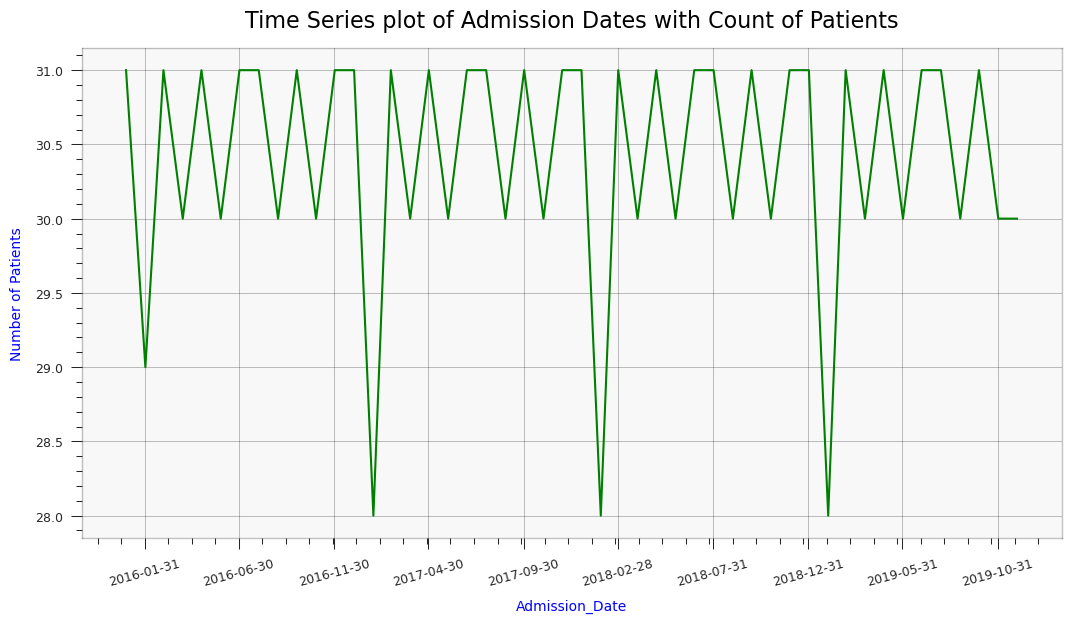

In [146]:

import numpy as np

# Generate sample data 
num_patients = 2008 
admission_dates = pd.date_range(start='01/01/2016', end='12/30/2019', freq='D')
data = {'Admission_date': admission_dates}
Demo = pd.DataFrame(data)


# Repeat each admission date according to the number of patients for that day
admission_dates = np.repeat(admission_dates, num_patients)
Demo['num_of_patients'] = num_patients

# Group by month and counting the  number of patients
Demo['Month'] = Demo['Admission_date'].dt.to_period('M')
monthly_counts = Demo.groupby('Month').size()

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values, color ='Green')

# Customize x-axis ticks to label for every 5 months
plt.xticks(pd.date_range(start='01/01/2016', end='12/30/2019', freq='5M'), rotation=15)

# Add labels for axis and title to the graph
plt.title('Time Series plot of Admission Dates with Count of Patients', fontsize = 16,)
plt.xlabel('Admission_Date',fontsize = 10,color='blue')
plt.ylabel('Number of Patients',fontsize = 10,color='blue')

plt.grid(True)



 ## 42. np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. When the value is less than 9, print as 0,else print 1


In [147]:
x = np.arange(1,21)
print(x)
B = x.reshape((4,5))
print(B)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


In [148]:
#slicing to get the elements 1,2,8,19. 
#B[0,:2]
slicing = B[[0,0,1,3],[0,1,2,3]]
slicing

array([ 1,  2,  8, 19])

In [149]:
# To print '0' if value<9 and '1' if value>9
for x in slicing:
    if x< 9:
        print(0),
        
    else:
        print(1)
        

0
0
0
1


## 43. Give Distribution chart of max Killip_grade

<Axes: title={'center': 'Distribution of Max Killip_grade'}, xlabel='Killip_grade', ylabel='Frequency'>

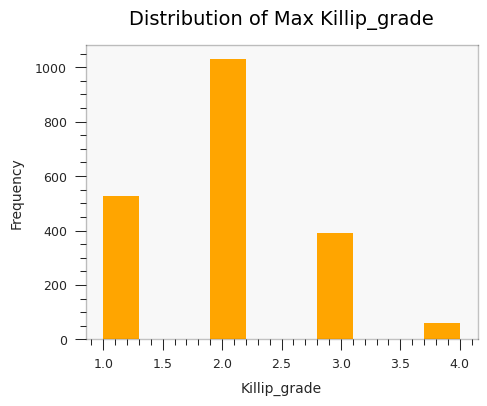

In [150]:
plt.figure(figsize=(4,3))
CardiacComplications = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'CardiacComplications')
CardiacComplications['Killip_grade'].hist()

# add labels and title
plt.title('Distribution of Max Killip_grade',fontsize = 14)
plt.xlabel('Killip_grade',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)


CardiacComplications['Killip_grade'].hist(color='Orange',grid = False)

# 44. Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [151]:
Demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography")
Demo.head(2)

inpatient_number  gender  weight  height        BMI     occupation ageCat
0            857781    Male    50.0    1.64  18.590125  UrbanResident  69-79
1            743087  Female    51.0    1.63  19.195303  UrbanResident  69-79

In [152]:
def Random_age(ageCat):
    Age_U, Age_L = map(int, ageCat.split('-'))
    return np.random.randint(Age_U, Age_L)

Demo['Age'] = Demo['ageCat'].apply(Random_age)
Age_Average = Demo.Age.mean()
Age_Average= round(Age_Average)
Age_Average
Demo.head(2)

inpatient_number  gender  weight  height        BMI     occupation ageCat  \
0            857781    Male    50.0    1.64  18.590125  UrbanResident  69-79   
1            743087  Female    51.0    1.63  19.195303  UrbanResident  69-79   

   Age  
0   70  
1   76

In [153]:
from datetime import datetime
Demo['year_of_birth'] = (datetime.now().year) - (Demo.Age)
Demo.year_of_birth.value_counts()

year_of_birth
1953    81
1954    79
1941    78
1942    76
1952    75
        ..
1992     1
2003     1
2000     1
1990     1
1993     1
Name: count, Length: 81, dtype: int64

In [154]:
Year_1945= Demo[Demo['year_of_birth']== 1945]
Year_1945

inpatient_number  gender  weight  height        BMI     occupation  \
52              763014    Male    45.0    1.60  17.578125  UrbanResident   
82              791627    Male    72.0    1.66  26.128611  UrbanResident   
134             747852  Female    49.0    1.50  21.777778         Others   
149             799246    Male    56.0    1.64  20.820940  UrbanResident   
156             830545  Female    39.0    1.53  16.660259  UrbanResident   
169             778525  Female    75.0    1.60  29.296875  UrbanResident   
171             809784  Female    70.0    1.55  29.136316  UrbanResident   
177             786199    Male    54.0    1.64  20.077335  UrbanResident   
213             799322  Female    45.0    1.50  20.000000  UrbanResident   
255             800350    Male    50.0    1.60  19.531250  UrbanResident   
315             787991  Female    68.0    1.58  27.239224  UrbanResident   
350             733863    Male    55.0    1.60  21.484375  UrbanResident   
382             863915    Male    65.0    1.67  23.306680  UrbanResident   
463             856438    Male    48.0    1.65  17.630854  UrbanResident   
580             801705    Male    70.0    1.68  24.801587  UrbanResident   
627             803428  Female    58.0    1.50  25.777778         Others   
628             803206  Female    50.0    1.50  22.222222  UrbanResident   
688             780741    Male    60.0    1.70  20.761246  UrbanResident   
748             735035    Male    60.0    1.60  23.437500         Others   
784             753274  Female    40.0    1.52  17.313019  UrbanResident   
1096            808317  Female    48.0    1.58  19.227688  UrbanResident   
1204            859666  Female    47.0    1.40  23.979592  UrbanResident   
1249            740494    Male    62.5    1.72  21.126284  UrbanResident   
1279            734408  Female    42.0    1.50  18.666667  UrbanResident   
1284            807994    Male    65.0    1.67  23.306680  UrbanResident   
1285            857036  Female    47.5    1.56  19.518409  UrbanResident   
1329            773313    Male    58.0    1.68  20.549887  UrbanResident   
1390            836877  Female    50.0    1.65  18.365473  UrbanResident   
1397            811783  Female    58.0    1.54  24.456063  UrbanResident   
1414            749038  Female    47.5    1.48  21.685537         Others   
1480            836224  Female    55.0    1.60  21.484375  UrbanResident   
1524            842218  Female    45.0    1.54  18.974532  UrbanResident   
1527            730284    Male    51.0    1.55  21.227888  UrbanResident   
1534            732084    Male    75.0    1.70  25.951557  UrbanResident   
1540            869958    Male    60.0    1.55  24.973985  UrbanResident   
1588            861817  Female    48.5    1.55  20.187305  UrbanResident   
1601            820920  Female    56.0    1.62  21.338211  UrbanResident   
1629            819977  Female    37.5    1.45  17.835910  UrbanResident   
1648            868748  Female    46.5    1.50  20.666667  UrbanResident   
1653            864584    Male    49.0    1.63  18.442546  UrbanResident   
1685            853406  Female    42.0    1.45  19.976219  UrbanResident   
1730            826879    Male    52.0    1.65  19.100092  UrbanResident   
1733            738248    Male    55.0    1.65  20.202020  UrbanResident   
1740            854121    Male    49.0    1.70  16.955017  UrbanResident   
1802            744263  Female    40.0    1.50  17.777778         farmer   
1818            860599  Female    49.0    1.55  20.395421         Others   
1893            859912  Female    45.5    1.45  21.640904  UrbanResident   
1913            827137  Female    35.0    1.45  16.646849  UrbanResident   
1944            784421    Male    65.0    1.70  22.491349  UrbanResident   
1968            762438  Female    49.0    1.40  25.000000  UrbanResident   
1977            732617    Male    50.0    1.60  19.531250  UrbanResident   

     ageCat  Age  year_of_birth  
52    79-89   79   

# 45. Create a dataframe with date and time as columns, where the values are the admission time

In [155]:
Discharge = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name ="Hospitalization_Discharge")
Discharge['Admission_date'] = pd.to_datetime(Discharge['Admission_date'])

# change the datetime format
Discharge['Admission_date_formatted'] = Discharge['Admission_date'].dt.strftime('%Y/%m/%d %H:%M:%S')
Discharge["date"] = " "
Discharge["time"] =" "

def split_date_time(Discharge):
    Discharge["Admission_date_formatted"] = pd.to_datetime(Discharge["Admission_date_formatted"])
   
    Discharge["Date"] = Discharge["Admission_date_formatted"].dt.date
    Discharge["Time"] = Discharge["Admission_date_formatted"].dt.time

split_date_time(Discharge)

print(Discharge.head())

   inpatient_number DestinationDischarge admission_ward admission_way  \
0            857781                 Home     Cardiology  NonEmergency   
1            743087                 Home     Cardiology  NonEmergency   
2            866418                 Home     Cardiology  NonEmergency   
3            775928                 Home     Cardiology     Emergency   
4            810128                 Home     Cardiology  NonEmergency   

  discharge_department  visit_times respiratory_support oxygen_inhalation  \
0           Cardiology            1                 NaN     OxygenTherapy   
1           Cardiology            1                 NaN     OxygenTherapy   
2           Cardiology            2                 NaN     OxygenTherapy   
3           Cardiology            1                 NaN     OxygenTherapy   
4           Cardiology            1                 NaN     OxygenTherapy   

   dischargeDay Admission_date  ... re_admission_within_6_months  \
0            11     2017-01-24

#### Comment :'Admission Time column doesn't exist , so considered 'Admission Date' column and converted 
#### it into datetime format. as the time is not specifirs so the time appears as 00:00:00 in 'time' Columm

## 46.Convert occupation into numeric by Label encoding

In [156]:
# reading data from Demography Sheet
Demo_data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Demography")

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
LE = LabelEncoder()
Demo_data['occupation_LE'] = LE.fit_transform(Demo_data.occupation)

Demo_data.head()

inpatient_number  gender  weight  height        BMI     occupation ageCat  \
0            857781    Male    50.0    1.64  18.590125  UrbanResident  69-79   
1            743087  Female    51.0    1.63  19.195303  UrbanResident  69-79   
2            866418    Male    70.0    1.70  24.221453         farmer  59-69   
3            775928    Male    65.0    1.70  22.491349  UrbanResident  69-79   
4            810128  Female    76.0    1.55  31.633715  UrbanResident  69-79   

   occupation_LE  
0              2  
1              2  
2              3  
3              2  
4              2

# 47.Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [159]:
import numpy as np
array = np.random.randint(low=1, high=10, size=(3,3))

  
print(array) 

#Fix the values and position of array by
# converting numpy array to dataframe 

df = pd.DataFrame(array, columns =['C1', 'C2', 'C3']) 
print("\nPandas DataFrame: ") 
df 


[[1 5 1]
 [6 1 1]
 [9 4 9]]

Pandas DataFrame: 


C1  C2  C3
0   1   5   1
1   6   1   1
2   9   4   9

# 48.Using loops, create a multiplication table for the number 7

In [160]:

Table_number = 7
Range_num = range(1,11)
for i in Range_num:
    Result = Table_number * i
    print(Table_number, "*", i, "=", Result)
    

7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
7 * 10 = 70


# 49.Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)



In [161]:
#!pip install psycopg2

import psycopg2   # To connect to postgresql

connection = psycopg2.connect(user = "postgres",
                              password= "4087968238",
                              host = "127.0.0.1",
                              port = "5432",
                              database = "Cardiac_Outcomes_Demography")

# Now connected to postgresql



ModuleNotFoundError: No module named 'psycopg2'

In [162]:
connection

NameError: name 'connection' is not defined

In [ ]:
cursor = connection.cursor()  # cursor() to execute commands 
cursor

In [ ]:
cursor.execute("select * from demography2")

#cursor.fetchall()

cursor = connection.cursor() 

cursor.execute("SELECT * FROM demography2 WHERE gender = 'Male'")

cursor.fetchall()



### Result - Query executed successfully (Q49)

# 50. Display the lab details of the patient with maximum pulse using the .loc


In [163]:
data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Labs')
data.head()

inpatient_number  body_temperature  pulse  respiration  \
0            857781              36.7     87           19   
1            743087              36.8     95           18   
2            866418              36.5     98           18   
3            775928              36.0     73           19   
4            810128              35.0     88           19   

   systolic_blood_pressure  diastolic_blood_pressure        map  fio2  \
0                      102                        64  76.666667    33   
1                      150                        70  96.666667    33   
2                      102                        67  78.666667    33   
3                      110                        74  86.000000    33   
4                      134                        62  86.000000    33   

   creatinine_enzymatic_method   urea  ...  measured_residual_base  \
0                        108.3  12.55  ...                    -2.1   
1                         62.0   4.29  ...                     NaN   
2                        185.1  15.99  ...                     NaN   
3                        104.8   8.16  ...                     NaN   
4                         83.9   6.86  ...                     NaN   

   measured_bicarbonate  carboxyhemoglobin  body_temperature_blood_gas  \
0                  21.2                0.4                        37.0   
1                   NaN                NaN                         NaN   
2                   NaN                NaN                         NaN   
3                   NaN                NaN                         NaN   
4                   NaN                NaN                         NaN   

   oxygen_saturation  partial_oxygen_pressure  oxyhemoglobin  anion_gap  \
0               97.0                     93.0           95.9       17.8   
1                NaN                      NaN            NaN        NaN   
2                NaN                      NaN            NaN        NaN   
3                NaN                      NaN            NaN        NaN   
4                NaN                      NaN            NaN        NaN   

   free_calcium  total_hemoglobin  
0          1.14             125.0  
1           NaN               NaN  
2           NaN               NaN  
3           NaN               NaN  
4           NaN               NaN  

[5 rows x 107 columns]

In [164]:
data.loc[:,['inpatient_number','pulse']]

inpatient_number  pulse
0               857781     87
1               743087     95
2               866418     98
3               775928     73
4               810128     88
...                ...    ...
2003            740689    117
2004            734280     70
2005            781004    113
2006            744870    134
2007            791864    100

[2008 rows x 2 columns]

In [165]:
max_pulse = data.loc[:,['inpatient_number','pulse']].max()              
max_pulse

inpatient_number    905720
pulse                  198
dtype: int64

##### *Comment -- The patient number of "905720" has the maximum pulse of "198" from the labs details data (Q50)*

# 51. Display a violin chart to show distribution of Pulse Rate against age.

In [166]:
labs= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs")

demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography")

In [167]:
pulse_rate = labs['pulse']
pulse_rate.head(2)

0    87
1    95
Name: pulse, dtype: int64

In [168]:
demo.head(2)

inpatient_number  gender  weight  height        BMI     occupation ageCat
0            857781    Male    50.0    1.64  18.590125  UrbanResident  69-79
1            743087  Female    51.0    1.63  19.195303  UrbanResident  69-79

In [169]:
age = demo['ageCat']
age.head(2)

0    69-79
1    69-79
Name: ageCat, dtype: object

In [170]:
merged = pd.merge(demo[['inpatient_number','ageCat']],labs[['inpatient_number','pulse']])
merged.head(2)

inpatient_number ageCat  pulse
0            857781  69-79     87
1            743087  69-79     95

<Axes: xlabel='ageCat', ylabel='pulse'>

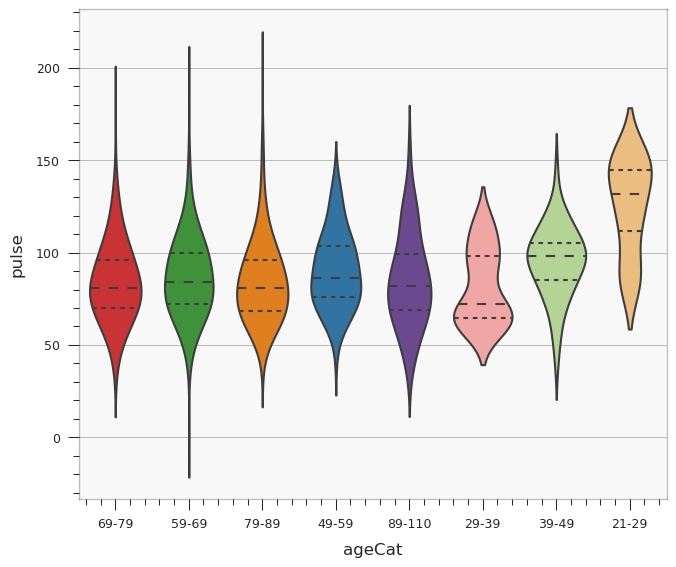

In [171]:
plt.figure(figsize= (6,5))
sns.violinplot(x='ageCat', y='pulse', data= merged, split= True, inner='quartile', bw= 0.5)

##### *Comment  --  As Highest pulse rate is 198 from above question(noticed) , this patient is in age category of 79-89 (Q51)*

# 52. Create a Point Plot on Age against time to readmission.

In [172]:
demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography")
age = demo['ageCat']
age.head(4)

0    69-79
1    69-79
2    59-69
3    69-79
Name: ageCat, dtype: object

In [173]:
Hospital= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
readmission_time= Hospital['readmission_time_days_from_admission']
readmission_time.head(8)

0     NaN
1     NaN
2     NaN
3    19.0
4     NaN
5    15.0
6     NaN
7    58.0
Name: readmission_time_days_from_admission, dtype: float64

In [174]:
mean_readmission_time = Hospital['readmission_time_days_from_admission'].mean()
mean_readmission_time

126.71143174250832

In [175]:
Hospital['readmission_time_days_from_admission'].fillna(0, inplace=True)
readmission_time.head(8)

0     0.0
1     0.0
2     0.0
3    19.0
4     0.0
5    15.0
6     0.0
7    58.0
Name: readmission_time_days_from_admission, dtype: float64

In [176]:
merged_pp = pd.merge(demo[['inpatient_number','ageCat']],Hospital[['inpatient_number','readmission_time_days_from_admission']])
merged_pp.head(10)

inpatient_number ageCat  readmission_time_days_from_admission
0            857781  69-79                                   0.0
1            743087  69-79                                   0.0
2            866418  59-69                                   0.0
3            775928  69-79                                  19.0
4            810128  69-79                                   0.0
5            823318  79-89                                  15.0
6            844094  79-89                                   0.0
7            787530  69-79                                  58.0
8            795420  79-89                                   0.0
9            829801  69-79                                   0.0

<Axes: xlabel='ageCat', ylabel='readmission_time_days_from_admission'>

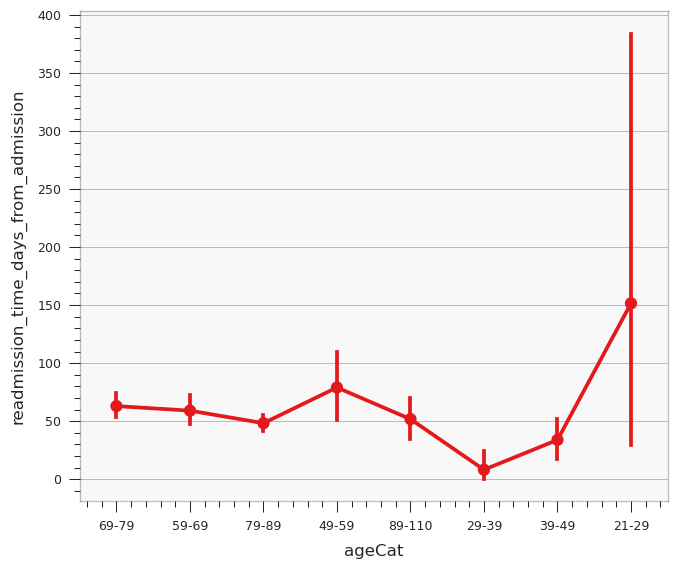

In [177]:
plt.figure(figsize=(6,5))
sns.pointplot(data= merged_pp, x='ageCat', y='readmission_time_days_from_admission')

##### *Comment - Each point represents the mean of readmission time for each category of age. (Q52)*

# 53. What is the correlation between CCI score and outcome?

In [178]:
Hospital= pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge")
outcome = Hospital['outcome_during_hospitalization']
outcome

0                       Alive
1                       Alive
2                       Alive
3                       Alive
4                       Alive
                ...          
2003    DischargeAgainstOrder
2004                    Alive
2005                    Alive
2006    DischargeAgainstOrder
2007                    Alive
Name: outcome_during_hospitalization, Length: 2008, dtype: object

In [179]:
CCI = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="PatientHistory")
CCI_score = CCI['CCI_score']
CCI_score

0       2.0
1       0.0
2       0.0
3       2.0
4       0.0
       ... 
2003    2.0
2004    1.0
2005    2.0
2006    2.0
2007    2.0
Name: CCI_score, Length: 2008, dtype: float64

In [180]:
merged = pd.merge(Hospital[['inpatient_number','outcome_during_hospitalization']],CCI[['inpatient_number','CCI_score']])
merged.head(10)


inpatient_number outcome_during_hospitalization  CCI_score
0            857781                          Alive        2.0
1            743087                          Alive        0.0
2            866418                          Alive        0.0
3            775928                          Alive        2.0
4            810128                          Alive        0.0
5            823318                          Alive        0.0
6            844094                          Alive        1.0
7            787530                          Alive        0.0
8            795420                          Alive        1.0
9            829801                          Alive        1.0

In [181]:
labels,categories = pd.factorize(merged['outcome_during_hospitalization'])
merged["labels"] = labels
correlation = abs(merged["CCI_score"].corr(merged["labels"]))

print("Output: Correlation between CCI_score & Outcome is: ", correlation)

Output: Correlation between CCI_score & Outcome is:  0.09384336715987615


##### *Comment-- A correlation coefficient value usually around 0 to 0.3 indicates weak realtionship and 0 with no linear relationship*.
##### *In this case, CCI_score and outcome represents a very weak positive correlation with 0.0938*

# 54. For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [182]:
arr = np.array([0,1,2,6,8])
for i in arr:
    print(i*i)

0
1
4
36
64


##### *Comment-- 'i' is the iteration process in the loop to iterate over each element in array and prints the squares of each elements*

# 55.Create a jointplot on diastolic_blood_pressure & length of stay



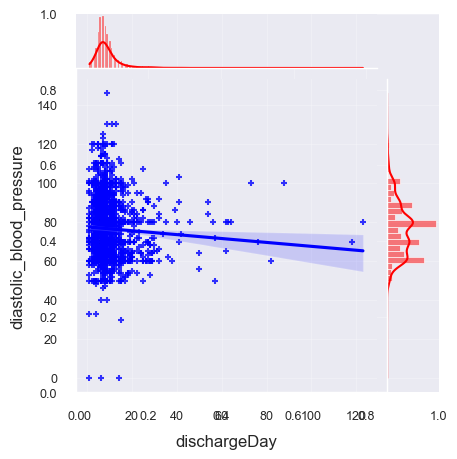

In [183]:
labs = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs")
hospital = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")

merged_jp = pd.merge(labs[['inpatient_number','diastolic_blood_pressure']],hospital[['inpatient_number','dischargeDay']])
#merged_jp.head(2)

# pd.set_option('mode.use_inf_as_na', True)   # tried to fix the warning appeared

sns.set_style('darkgrid')

sns.jointplot(data = merged_jp, x= 'dischargeDay', y = 'diastolic_blood_pressure', kind='reg', height=5,
                                                            joint_kws= dict(marker='+', color='blue'),
                                                             marginal_kws = dict(color= 'red'))


##### *Comment -- Highest length of stay is over 120 days.* 
##### *The regression line  and relational plot appears along with the KDE marginal distribution* 

# 56. Using loc, retrieve the agegroup and weight between indices 101 and 201.


In [184]:
Demog = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Demography")
#Demog.head(2)

Demog[['ageCat','weight']]

Demog.loc[101:201,['ageCat','weight']]    #Retrieved Rows from 101 to 201 for age category and weight 

ageCat  weight
101   69-79    41.0
102   79-89    64.0
103   79-89    61.0
104   79-89    40.0
105   69-79    73.0
..      ...     ...
197   79-89    50.0
198  89-110    50.0
199   69-79    50.0
200   59-69    63.0
201   69-79    60.0

[101 rows x 2 columns]

# 57.Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as value

In [185]:
Hospital= pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")
#Hospital.head(2)

Hospital = Hospital[['inpatient_number','admission_ward','outcome_during_hospitalization']]
#Hospital

pTable = Hospital.pivot_table(index= 'admission_ward', columns='outcome_during_hospitalization', aggfunc='count')
pTable 

inpatient_number                           
outcome_during_hospitalization            Alive Dead DischargeAgainstOrder
admission_ward                                                            
Cardiology                                 1472    8                    67
GeneralWard                                 238    1                    26
ICU                                          12    1                     2
Others                                      168    1                    12

##### *Comment-- count of patients in Cardiology ward are higher compared to other admission wards*

# 58. Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

In [186]:
hospital = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")
#hospital.head(2)

hospital[['readmission_time_days_from_admission','dischargeDay']].head(10)

readmission_time_days_from_admission  dischargeDay
0                                   NaN            11
1                                   NaN             8
2                                   NaN             5
3                                  19.0            11
4                                   NaN             5
5                                  15.0             6
6                                   NaN            10
7                                  58.0            27
8                                   NaN            20
9                                   NaN             4

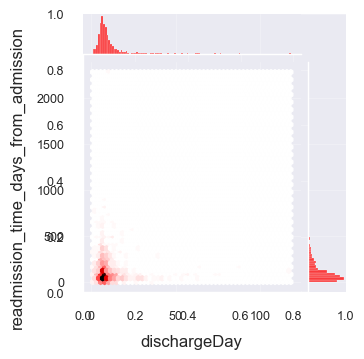

In [187]:
sns.set_style('darkgrid')

sns.jointplot(data = hospital, x='dischargeDay', y='readmission_time_days_from_admission', kind ='hex', height=4, color='r')
plt.show()

##### *comment--more density points which are closely packed are in between around 0 to 25 positions indicates patients readmitted very shortly after discharge* 
##### *and there are also many NaN values in readmission*

# 59. Using Sunburst chart display patients Age group, occupation and BMI Group

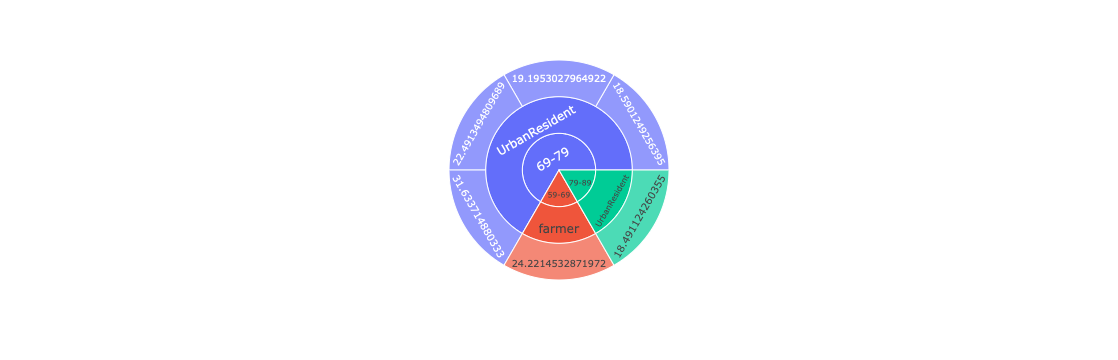

In [188]:
import plotly.express as px

data = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Demography")

columns = data[['ageCat','BMI','occupation']].head(6)

fig = px.sunburst(columns, path= ['ageCat','occupation','BMI'])
fig.show()

### *Comment - The highest BMI groups are in Urban Residents with in the age group of 69-79*

### Q59.1: Sunburst chart to display age group and BMI

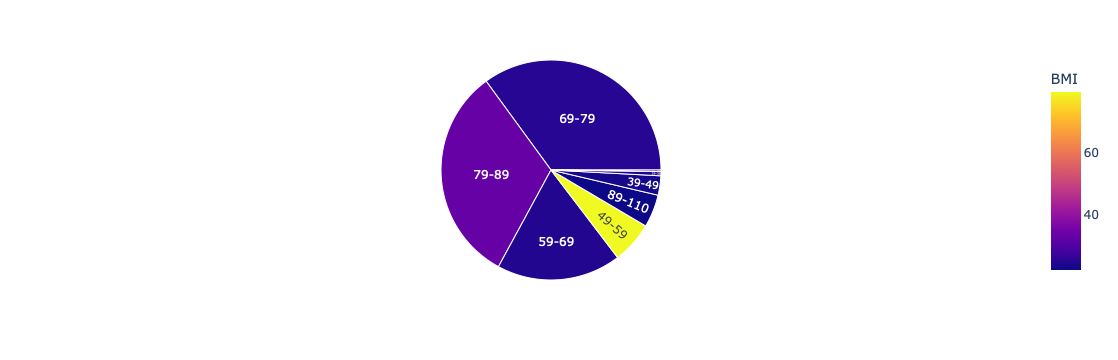

In [189]:
## Data filling NaN values as said :

data_filled = data.fillna({'ageCat':'unknown','BMI':0,'occupation':'unknown'})
data_filled.head(4)

import plotly.express as px

fig = px.sunburst(data_filled, path= ['ageCat'], values ='BMI', color='BMI', 
                  color_discrete_sequence=['darkorange'])

fig.show()


##### *Comment - The scale of BMI indicates --* 
#####  *highest in the age group of 79-89 with BMI of 32.8*
##### *69-79 with BMI of 24.5*
##### *59-69 with BMI of 24.1* (Q59.1)

##### Sunburst Figures are not showing up in github due to some reason, 
##### But presented the screenshots of this sunburst chart (Q59.1) in screenshot document. Please go through


### Q59.2: Sunburts chat to display Occupation BMI

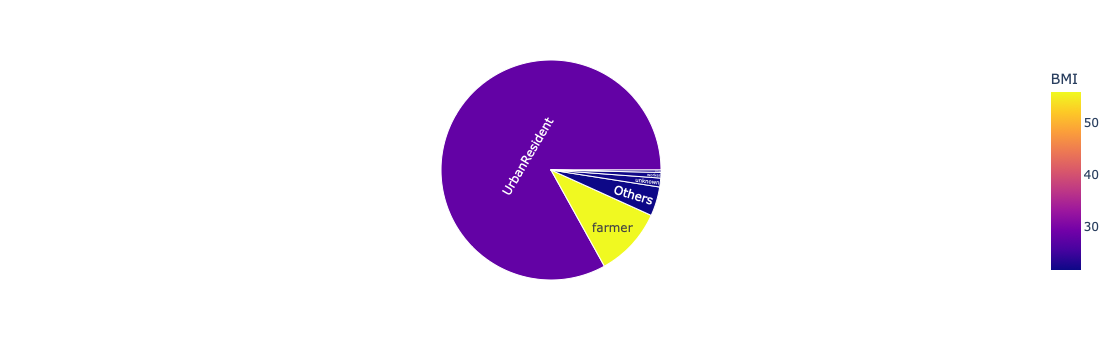

In [190]:
fig = px.sunburst(data_filled, path= ['occupation'], values ='BMI', color='BMI',
                  color_discrete_map={'UrbanResident':'black', 'farmer':'gold', 'Others':'darkblue'})
fig.show()

##### *Comment - The scale of BMI in occupation indicates  --* 
#####  *highest BMI recorded with 55.9 is in farmers*
##### *With BMI of 27.9 is in Urban Resident occupants but patient population is higher in Urban residents*
##### *Remaining occupants as shown in figure* (Q59.2)

##### Sunburst Figures are not showing up in github due to some reason, 
##### But presented the screenshots of this sunburst chart (Q59.2) in screenshot document. Please go through

# 60. Plot the Density Chart for visit times

<Axes: xlabel='visit_times', ylabel='Density'>

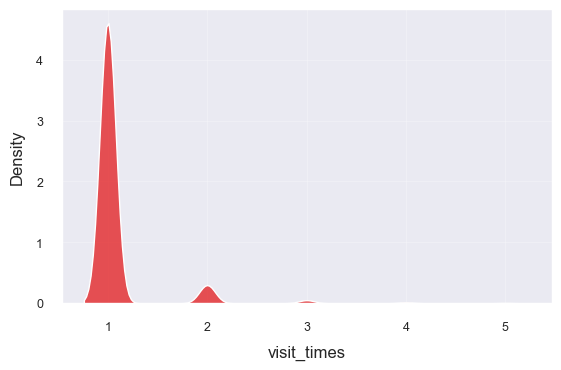

In [191]:
hospital = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")

hospital[['visit_times']]

## Density chart is also known as Kernal Density plot or Density Trace Graph
plt.figure(figsize=(5,3))

sns.kdeplot(data = hospital, x='visit_times', multiple='stack')

#### *Comment - This proportion of patients were admitted to the hospital for their first time visit before their hospitalization. Second and third visits have lesser admissions*
#### *Density refers to be hospital admissions*
#### *visit_times defines -- "the number of hospital admissions before this hospitalization"*

# 61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [192]:
arr = np.arange(1,31)
arr

arr1 = arr.resize(6,5)
print(arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [193]:
arr[2:4,0:2].ravel()  # slicing array to get the required elements

array([11, 12, 16, 17])

#### *Comment -- ravel is a function used to flatten the multi dimensional array in numpy*

# 62. What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group

In [194]:
data1 = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")

data2 = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs")

md = pd.merge(data1[['inpatient_number','outcome_during_hospitalization','death_within_28_days']],data2[['inpatient_number','mean_platelet_volume']])

# showing all outcome patients who are Alive and died within 28 days using conditional filtering 

patients_28 = md[ (md['outcome_during_hospitalization']=='Alive') & (md['death_within_28_days']==1) ]

patients_28

inpatient_number outcome_during_hospitalization  death_within_28_days  \
43              798240                          Alive                     1   
74              733308                          Alive                     1   
94              777721                          Alive                     1   
140             860325                          Alive                     1   
398             868283                          Alive                     1   
505             833564                          Alive                     1   
569             730165                          Alive                     1   
1339            774652                          Alive                     1   

      mean_platelet_volume  
43                    12.4  
74                    14.3  
94                    11.9  
140                   12.8  
398                   13.4  
505                   10.4  
569                   11.3  
1339                  14.3

##### To calculate the percentage of patients_28

In [195]:
percentage_28 = (len(md[ (md['outcome_during_hospitalization']=='Alive') & (md['death_within_28_days']==1) ])/len(md)) * 100

percentage_28

percentage_28 = 0.398406374501992 * 100
percentage_28

print(f"Percentage of with outcome of Alive and died within 28 days is: {percentage_28:.2f}%")
  

Percentage of with outcome of Alive and died within 28 days is: 39.84%


##### To check the mean of mean_platelet_volume from this 8 patients 

In [196]:
mean = patients_28['mean_platelet_volume'].mean()

print(f"mean of this mean platelet volume group is : {mean:.2f}")

mean of this mean platelet volume group is : 12.60


##### *Comment -- There are 8 patients who are alive but died after 28 days whose 
##### *mean(mean_platlet_volume) = 12.6 and percentage of this 8 patients = 39.84%*

# 63. find the patients who have 'h' in their DestinationDischarge and print them

In [197]:
hospital = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Hospitalization_Discharge")
#hospital.head(2)

filtered_DD = hospital[hospital.DestinationDischarge.str.contains('h')]['DestinationDischarge']
print(filtered_DD)

7       HealthcareFacility
18      HealthcareFacility
22      HealthcareFacility
29      HealthcareFacility
31      HealthcareFacility
               ...        
2001    HealthcareFacility
2002    HealthcareFacility
2003    HealthcareFacility
2004    HealthcareFacility
2005    HealthcareFacility
Name: DestinationDischarge, Length: 438, dtype: object


In [198]:
filtered_DD.value_counts()  # value_counts is function to check on counts

DestinationDischarge
HealthcareFacility    438
Name: count, dtype: int64

#### *Comment -- filtered__DD is , Health care Facility patients where count is 438*

# 64. Create a grouped bar chart that shows number of patients by gender and ageCat

Text(0.5, 1.0, 'Age and gender Distribution')

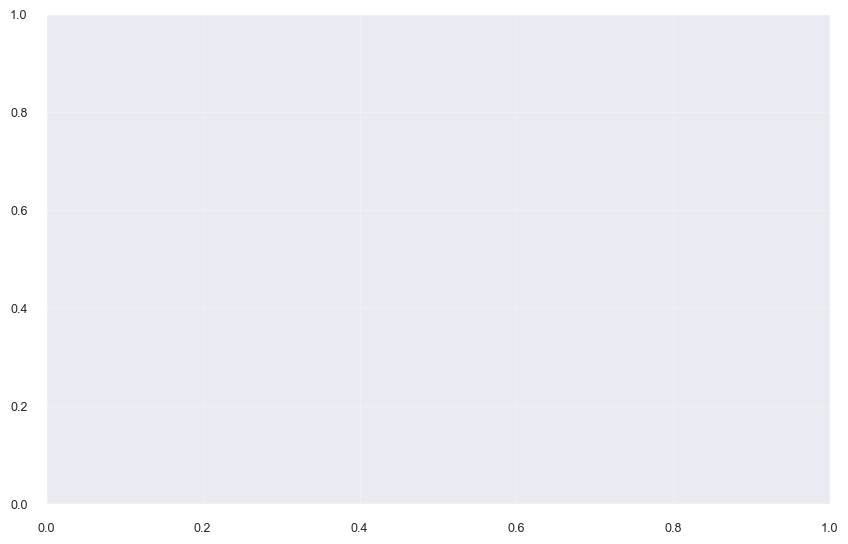

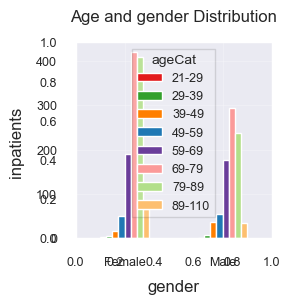

In [201]:
Demog = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Demography")

grouped = Demog.groupby(['gender','ageCat']).size().unstack()

#total_patients = len(Demog)
#total_patients

#Res = grouped.div(total_patients)
#Res
plt.figure(figsize=(8,5))

grouped.plot(kind ='bar')
plt.xticks(rotation=0)
plt.ylabel("inpatients ")
plt.title("Age and gender Distribution")

#### *Comment- Majority of them are Female inPatients with age group of 69-79 through out the dataset*

# 65-Which Admission Ward has maximum number of visits scheduled


In [202]:
data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Hospitalization_Discharge')
list = data.groupby('admission_ward').sum('visit_times')
max_value = max(list.visit_times)
result = list.where(list['visit_times'] == max_value).head(1)
result['visit_times'].reset_index()

admission_ward  visit_times
0     Cardiology       1703.0

#### *Comment- Cardiology ward has a maximum number of visits scheduled.*

# 66-Display total count of patients in each discharge_department based on gender


In [203]:
data1 = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Hospitalization_Discharge')
data2 = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Demography')
list = pd.merge (data1,data2, on='inpatient_number', how='inner')
grouplist= list.groupby(['discharge_department', 'gender'])

result= grouplist['gender'].value_counts() 
print(result)

discharge_department  gender
Cardiology            Female    993
                      Male      710
GeneralWard           Female    137
                      Male      104
ICU                   Female      5
                      Male        7
Others                Female     28
                      Male       24
Name: count, dtype: int64


#### Comment- on the basis of the above number female patient's discharge rate is higher in most of the department.

# 67-How many Unique patients were precribed each type of medication?

In [204]:
data1 = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Patient_Precriptions')

#### Comments -Here is the list of unique patients who were prescribed each type of medication.

In [205]:
data1.groupby('Drug_name')['inpatient_number'].nunique()

Drug_name
Aspirin enteric-coated tablet                        958
Atorvastatin calcium tablet                          822
Benazepril hydrochloride tablet                      434
Clopidogrel Hydrogen Sulphate tablet                 401
Deslanoside injection                               1017
Digoxin tablet                                       999
Dobutamine hydrochloride injection                    22
Enoxaparin Sodium injection                          113
Furosemide injection                                1720
Furosemide tablet                                   1641
Heparin Sodium injection                             153
Hydrochlorothiazide tablet                           283
Isoprenaline Hydrochloride injection                  30
Isosorbide Mononitrate Sustained Release tablet      326
Meglumine Adenosine Cyclophosphate for injection    1115
Metoprolol Succinate Sustained-release tablet        523
Milrinone injection                                  709
Nitroglycerin injecti

# 68 - Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [206]:
data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Hospitalization_Discharge')

data1 =  data[(data['dischargeDay'] > 20)]['dischargeDay'].nlargest(5)
data2 = pd.merge(data,data1, on='dischargeDay', how='inner')
print(data2.groupby('outcome_during_hospitalization')['outcome_during_hospitalization'].max()) 
data2[['inpatient_number','outcome_during_hospitalization']]

outcome_during_hospitalization
Alive    Alive
Name: outcome_during_hospitalization, dtype: object


inpatient_number outcome_during_hospitalization
0            794077                          Alive
1            757711                          Alive
2            791880                          Alive
3            794784                          Alive
4            768711                          Alive

#### Comments-5 patients with the highest discharge days greater than 20, those are discharged alive in most common cases.

# 69 - Get the list of patient ID's which are not there in prescriptions but in demographics


In [207]:
data1 = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Demography')
data2 = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = 'Patient_Precriptions')

# Merge data1 with data2, keeping only rows unique to data1
result = data1.merge(data2, on='inpatient_number', how='left', indicator=True).query('_merge == "left_only"').drop(columns='_merge')

print(result)

       inpatient_number gender  weight  height       BMI     occupation  \
11160            789308   Male    55.0    1.65  20.20202  UrbanResident   

      ageCat Drug_name  
11160  69-79       NaN  


#### Comments- there is one patient who is available on demographics but not in prescriptions.

# 70 - On average, what is the most frequent weekday of admission?

In [208]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
hdData = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Hospitalization_Discharge')
from datetime import datetime
#print(hdData['Admission_date'][0].weekday())
#hdData['DayNumber'] = (hdData['Admission_date'].weekday())

def GetWeekDayNumber(row):
    return row['Admission_date'].weekday()
def GetDayNameFromNumber(daynumber):
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days[daynumber]
hdData['WeekdayNumber'] = hdData.apply(GetWeekDayNumber, axis=1)
hdDataGroup = hdData[hdData['WeekdayNumber'].between(0,4)]
hdDataGroup['size'] = hdDataGroup.groupby('WeekdayNumber')['WeekdayNumber'].count()
max_row = hdDataGroup[hdDataGroup['size'] == hdDataGroup['size'].max()]

print('On average, \'' + GetDayNameFromNumber(max_row['WeekdayNumber'][0]) + '\' is the most frequent weekday of admission')

On average, 'Tuesday' is the most frequent weekday of admission


#### Comments- 'Tuesday' is the most frequent weekday of admission


# 71 - Which year had the maximum admissions

In [209]:
Adm = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Hospitalization_Discharge", usecols='J')

In [210]:
Adm['year_adm'] = pd.DatetimeIndex(Adm['Admission_date']).year

In [211]:
Adm.year_adm.value_counts()

year_adm
2016    518
2018    498
2017    496
2019    496
Name: count, dtype: int64

#### Comment - Maximum hospital admissions happened in year 2016 - 518 patients

# 72-What % of the dataset is male vs female?


In [212]:
data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Demography')

totalCount = data['gender'].count()
genderCount = data['gender'].value_counts()
female_Percentage = (genderCount['Female'] * 100)/ totalCount
print('Female percentage = ' + str(round(female_Percentage, 2)) + '%' )

male_Percentage = (genderCount['Male'] * 100)/ totalCount
print('Male percentage = ' + str(round(male_Percentage, 2)) + '%' )


Female percentage = 57.92%
Male percentage = 42.08%


#### Comment - female percentage is more compare to male i.e.57.92 %

# 73 - Which patient in the youngest age category weighs the most?


In [213]:
dataDemography = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Demography')

youngestAge = -1
youngestAgeValue = ''
for index, row in dataDemography.iterrows():                
    numbers1 = row['ageCat'].split('-'),
    if(youngestAge == -1): 
        youngestAge = int(numbers1[0][0])
        
    if(int(numbers1[0][0]) < youngestAge):
        youngestAge = int(numbers1[0][0])
        youngestAgeValue = row['ageCat']

mostWeighsPatients = dataDemography[dataDemography['ageCat'] == youngestAgeValue]
mostWeighs = mostWeighsPatients['weight'].max()
patient = mostWeighsPatients[mostWeighsPatients['weight'] == mostWeighs]

print('Patient id:' + str(patient['inpatient_number'].values[0]) + ' is weighs the most ' + str(mostWeighs) + ' in age category: ' + youngestAgeValue)


Patient id:831184 is weighs the most 82.5 in age category: 21-29


#### Comments- patientID 831184 is the weighted most in the younger age catogery.

# 74 - Which adm ward had the lowest rate of Outcome Death?


In [214]:
data= pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Hospitalization_Discharge')

listDeath = data.where(data['outcome_during_hospitalization'] == 'Dead')

listDeath.admission_ward.value_counts()

admission_ward
Cardiology     8
ICU            1
GeneralWard    1
Others         1
Name: count, dtype: int64

#### Comments- GeneralWard,ICU and Others wards had the lowest rate of outcome Death.

# 75- What % of those with an outcome of death, had myocardial infarction?

In [215]:
dataDischarge = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Hospitalization_Discharge')
dataCardiac = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='CardiacComplications')

d1 = dataDischarge[(dataDischarge['outcome_during_hospitalization'] == 'Dead')] 
d2 = dataCardiac[(dataCardiac['myocardial_infarction'] == 1)] 

d3 = pd.merge(d1, d2, on='inpatient_number', how='inner')

d3_counts  = d3.count().head(1)
d1_counts  = d1.count().head(1)

percntg= (d3_counts * 100) / d1_counts

print(str(round(percntg['inpatient_number'], 2)) + '% of an outcome of death, had myocardial infarction')

9.09% of an outcome of death, had myocardial infarction


#### Comments- total 9.09% of the patients are died was suffering with myocardial infarction.

# 76-What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [216]:
data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='CardiacComplications')

congelist = data['congestive_heart_failure'].value_counts()[1]
typelist = data['type_of_heart_failure'].value_counts()['Both']
print(congelist)
print(typelist)

result=round(typelist/congelist,2)
#print(result)
print('the ratio of those with congestive heart failure to those who had type of heart failure Both = 1 is to ' + str(result))

1872
1480
the ratio of those with congestive heart failure to those who had type of heart failure Both = 1 is to 0.79


#### Comment - the ratio of those with congestive heart failure to those who had type of heart failure Both = 1 is to 0.79


# 77-List the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death)

In [246]:
# Killip.grade: 
    #Class 1 No rales, no 3rd heart sound; 
    #Class 2 Rales in <1â„2 lung field or presence of a 3rd heart sound; 
    #Class 3 Rales in >1â„2 lung fieldâ€“pulmonary edema;
    #Class 4 Cardiogenic shock determined clinically
 
#excel = Responsivenes
#GCS = sever GCS score = 3–8

#get data from 'CardiacComplications' where killip_grade = 4
#get data from 'Responsivenes' where GCS is greater than or equal to 3 and less than or equal to 8
#get data from 'Hospitalization_Discharge' where outcome_during_hospitalization is not 'Dead' (question says higher risk of death means not Dead)
#get all patient merging above three dataframe

ccData = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='CardiacComplications')
respData = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Responsivenes')
hdData = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Hospitalization_Discharge')

cardiogenicShockDetermined = ccData[ccData['Killip_grade'] == 4]

responsivenes = respData[respData['GCS'].between(3,8)]



In [247]:
outcomeDuringHospitalization_dead = hdData[hdData['outcome_during_hospitalization'] == 'Dead']

#merge all three datasets - For hospitalization outcome of 'dead'
merged1 = pd.merge(responsivenes, cardiogenicShockDetermined, on='inpatient_number')
finalMerged_dead = pd.merge(merged1, outcomeDuringHospitalization_dead, on='inpatient_number')

Cardiogenicshock_severeGCS_Dead=finalMerged_dead['inpatient_number']
print("Number of Dead patients under the Cardiogenic shock and severeGCS is " + str(Cardiogenicshock_severeGCS_Dead.count()) )
Cardiogenicshock_severeGCS_Dead


Number of Dead patients under the Cardiogenic shock and severeGCS is 5


0    834443
1    854580
2    765343
3    805475
4    750447
Name: inpatient_number, dtype: int64

In [248]:
outcomeDuringHospitalization_discharge = hdData[hdData['outcome_during_hospitalization'] == 'DischargeAgainstOrder']

#merge all three datasets - For hospitalization outcome of 'dead'
merged1 = pd.merge(responsivenes, cardiogenicShockDetermined, on='inpatient_number')
finalMerged_discharge = pd.merge(merged1, outcomeDuringHospitalization_discharge, on='inpatient_number')

Cardiogenicshock_severeGCS_discharge=finalMerged_discharge['inpatient_number']
print("Number of discharge against order patients under the Cardiogenic shock and severeGCS is " + str(Cardiogenicshock_severeGCS_discharge.count()) )
Cardiogenicshock_severeGCS_discharge


Number of discharge against order patients under the Cardiogenic shock and severeGCS is 7


0    830368
1    730841
2    797195
3    803770
4    835988
5    859912
6    744870
Name: inpatient_number, dtype: int64

In [249]:
outcomeDuringHospitalization = hdData[hdData['outcome_during_hospitalization'] == 'Alive']

#merge all three datasets - For hospitalization outcome of 'Alive'
merged1 = pd.merge(responsivenes, cardiogenicShockDetermined, on='inpatient_number')
finalMerged = pd.merge(merged1, outcomeDuringHospitalization, on='inpatient_number')

Cardiogenicshock_severeGCS_Alive=finalMerged['inpatient_number']

print("Number of Alive patients under the Cardiogenic shock and severeGCS is " + str(Cardiogenicshock_severeGCS_Alive.count()) )
Cardiogenicshock_severeGCS_Alive

Number of Alive patients under the Cardiogenic shock and severeGCS is 0


Series([], Name: inpatient_number, dtype: int64)

# 78-Give the count of patients who have experinced tachicardia or bradycardia.


In [250]:
data = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name ='Labs')
# BradyCardia  = Pulse < 60 
# TouchyCardia = Pulse > 100  

pulselist = data['pulse']
pulseBrady  = pulselist.where(pulselist > 100).count()
pulseTouchy = pulselist.where(pulselist < 60).count()

print('BradyCardia =' , pulseBrady)
print('TouchyCardia =',pulseTouchy)


BradyCardia = 417
TouchyCardia = 154


#### Comment- the patient who are having BradyCardia is more compare to those who are having TouchyCardia

# 79 - Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

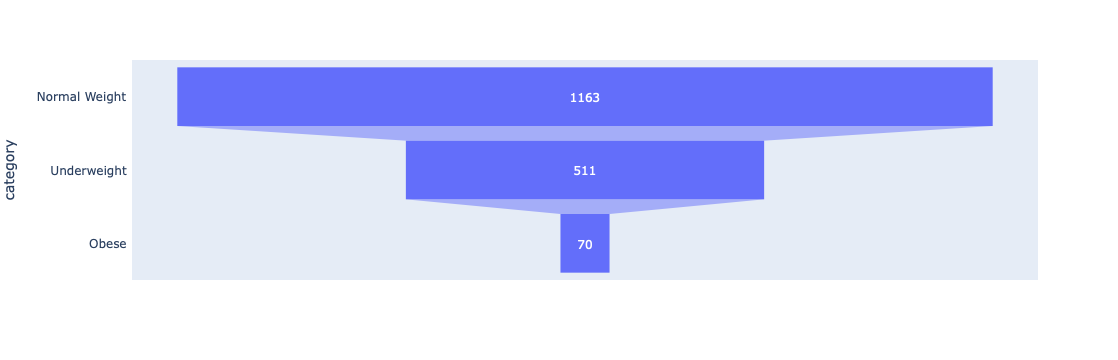

In [251]:
# BMI Category
# Below 18.5	Underweight
# 18.5 – 24.9	Healthy Weight
# 30.0 and Above	Obesity
import plotly.express as px

demographyData = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name='Demography')

#get number of record count using len() function
normalWeight = len(demographyData[demographyData['BMI'].between(18.5, 24.9)])
Underweight = len(demographyData[demographyData['BMI'] < 18.5])
Obese = len(demographyData[demographyData['BMI'] > 30])

chartData = dict(
    patientCount=[normalWeight, Underweight, Obese],
    category=["Normal Weight ", "Underweight ", "Obese "]
)

fg = px.funnel(chartData, x='patientCount', y='category')
fg.show()


# 80 - Delete the column age from Q26 iteratively.


In [252]:
#26 copy
Demo = pd.read_excel("Cardiac_outcomes.xlsx",sheet_name="Demography", usecols= "A,G")
Demo.head(2)
def Random_age(ageCat):
    Age_U, Age_L = map(int, ageCat.split('-'))
    return np.random.randint(Age_U, Age_L)

Demo['Age'] = Demo['ageCat'].apply(Random_age)
Age_Average = Demo.Age.mean()
Age_Average= round(Age_Average)
Age_Average
print(Demo.head())

# delete age column iteratively
for col in Demo.columns:
    if 'Age' in col:
        del Demo[col]
Demo.head(2)

   inpatient_number ageCat  Age
0            857781  69-79   77
1            743087  69-79   74
2            866418  59-69   66
3            775928  69-79   72
4            810128  69-79   77


inpatient_number ageCat
0            857781  69-79
1            743087  69-79